<h1><center>Housing Price Prediction</center><h1>

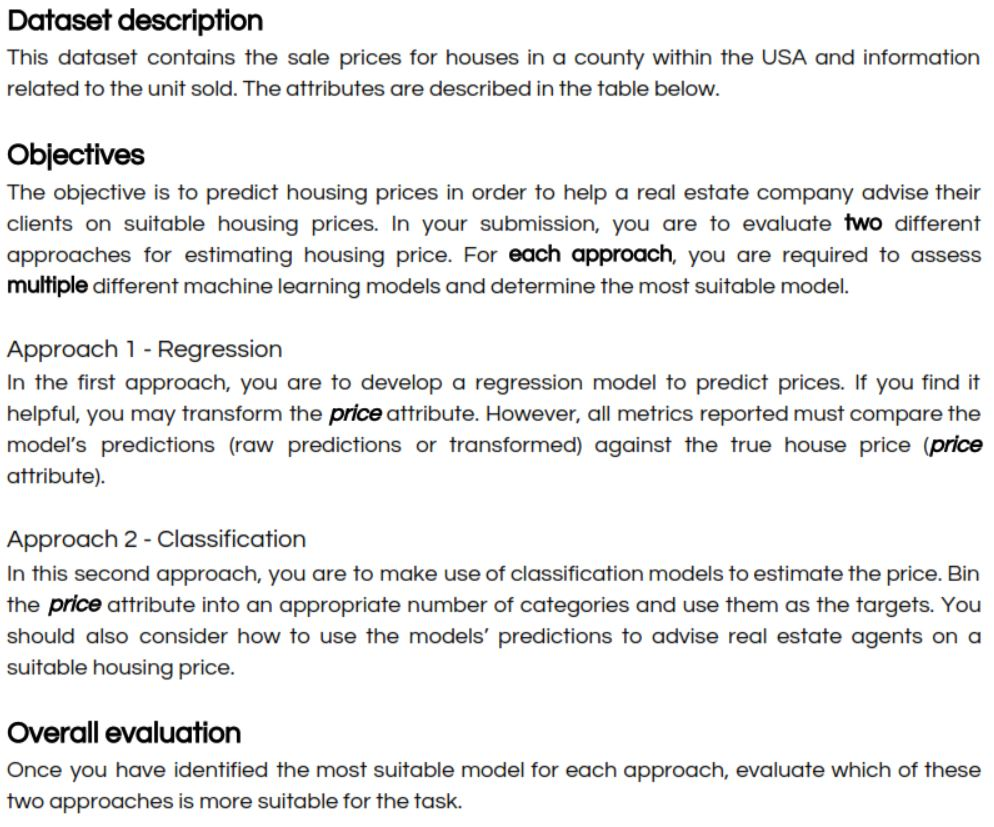

In [1]:
from IPython.display import Image
Image(filename='diagram/Task1.JPG')

## Content
- **1.0. Import Library**
- **2.0. Define Functions**
- **3.0. Define Variables**
- **4.0. Reading in Dataset**
- **5.0. Checking and Analysing Dataset info and statistics**
  - 5.1. *Checking dataset statistics*
  - 5.2. *Checking for null data*
  - 5.3. *Checking on each feature characteristics - How they affect the House Price*
      - 5.3.1 *bedrooms*
      - 5.3.2 *bathrooms*
      - 5.3.3 *floors*
      - 5.3.4 *waterfront*
      - 5.3.5 *view*
      - 5.3.56 *condition*
      - 5.3.7 *review_score*
      - 5.3.8 *basement_size*
      - 5.3.9 *built*
      - 5.3.10 *renovation*
      - 5.3.11 *zipcode*
      - 5.3.12 *latitude*
      - 5.3.13 *longitude*
      - 5.3.14 *living_romom_size*
      - 5.3.15 *lot_size*
  - 5.4. *Checking on feature correlations*  
- **6.0. Feature Engineering**
  - 6.1. *Category Data Encoding*
  - 6.2. *Drop unuseful features and null rows*
- **7.0. Save featured Engineered dataset for regression**
- **8.0. Create dataset target for classification**
  - 8.1. *Create bin of price target using pandas cut*
      - 8.1.1 Create bin with qcut quadrant
      - 8.1.2 Create bin with cut using custom define range
      - 8.1.3 Final bin cut
- **9.0. Save featured Engineered dataset for classification**
<br><br>

# Data Exploration Analysis (EDA)

## 1.0 Import Library

In [1]:
# For pandas dataframe and numpy array library 
import pandas as pd
import numpy as np

# For ploting visualisation library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# FOr SQLite library
from src.sql_tools import create_connection, sql_fetch

# For label encoding and scaling of data
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## 2.0 Define Functions

In [2]:
#=========================================================================
# Function to Check on feature data count and vs target
#=========================================================================

def Feature_Plot_Check(feature1, feature2):
    
    subtitle = feature1 + ' Data'
    title1 = feature1 + " Count"
    title2 = feature1 + ' vs ' + feature2
    filename = 'diagram/' + feature1 + '_check.png'
    
    # Ploting two figure side by side
    fig = plt.figure(figsize=(60,20)) #  figure
    fig.suptitle(subtitle, fontsize=40, fontweight='bold')
    
    ax1 = fig.add_subplot(121)
    ax1.set_title(title1, fontsize=30)
    ax1.xaxis.set_tick_params(labelsize=30)
    ax1.yaxis.set_tick_params(labelsize=30)
    ax1.set_xlabel(feature1)
    ax1.set_ylabel('Counts')
    ax1.xaxis.label.set_size(40)
    ax1.yaxis.label.set_size(40)
    
    ax2 = fig.add_subplot(122)
    ax2.set_title(title2, fontsize=30)
    ax2.xaxis.set_tick_params(labelsize=30)
    ax2.yaxis.set_tick_params(labelsize=30)
    ax2.set_xlabel(feature1)
    ax2.set_ylabel(feature2)
    ax2.xaxis.label.set_size(40)
    ax2.yaxis.label.set_size(40)
    
    plt.subplot(121) # 1st figure
    df[feature1].value_counts().plot(kind='bar')

    plt.subplot(122) # 2nd figure
    plt.scatter(df[feature1],df[feature2])
    # Save the chart to file
    plt.savefig(filename, bbox_inches="tight")


## 3.0 Define Variables

In [9]:
database = r"data/home_sales.db"

## 4.0 Reading in the dataset

Reading database using SQLite tools

In [10]:
# create a database connection
conn = create_connection(database)

In [11]:
# Check what are the tables in the database
np.array(sql_fetch(conn))

[('sales',)]


array(None, dtype=object)

Read in the table data using dataframe

In [7]:
sql ='SELECT * FROM sales'
df = pd.read_sql(sql, con=conn)

price is the target

In [8]:
df

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23149,7681392.0,30 September 2014,455000.0,2.0,1.75,1.0,0.0,0.0,fair,6.0,0.0,2004.0,0.0,98053.0,47.7171,-122.033,1440.0,4839.0
23150,6990763.0,24 October 2014,239000.0,3.0,1.50,1.0,0.0,0.0,fair,NaN,430.0,1971.0,0.0,98188.0,47.4239,-122.292,1400.0,11500.0
23151,7261690.0,13 April 2015,179000.0,2.0,1.00,1.0,0.0,0.0,FAIR,11.0,0.0,1949.0,0.0,98188.0,47.4488,-122.274,1100.0,8916.0
23152,6844960.0,04 May 2015,450000.0,3.0,1.00,1.5,0.0,0.0,good,7.0,0.0,1917.0,0.0,98118.0,47.5620,-122.289,1140.0,3960.0


## 5.0 Checking and analysing the dataset info and statistics

### 5.1 Checking on dataset statistics

- The dataset has a house that has range of 0 to 11 bedrooms, 0 to 8 bathrooms with 1 to 3.5 floors.
- It has basement size of 0 to 4820 sqft and built years from 1900 to 2015. This basement_size features seems to have many 0 value may not be a good candidate for the feature engineering
- renovation feature which describe the year of renovation of the house data has shown dicreprancy since it ranges from 0 to 2015. This features seems to have many 0 value may not be a good candidate for the feature engineering
- Category feature are 
    - bedrooms
    - bathrooms
    - floors
    - waterfront
    - view
    - condition
    - review_score

In [8]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
count,2.187100e+04,21925,2.189600e+04,21905.000000,21938.000000,21862.000000,21871.000000,21908.000000,21890,21851.000000,21929.000000,21853.000000,21897.000000,21884.000000,21903.000000,21883.000000,21912.000000,21932.000000
unique,NaN,488,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,23 June 2014,NaN,NaN,NaN,NaN,NaN,NaN,fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,13104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.393268e+06,NaN,5.406538e+05,3.368820,2.112339,1.494397,0.007910,0.231833,NaN,7.655439,291.298053,1970.976571,85.129287,98077.871093,47.560590,-122.214179,1986.661464,12778.076737
std,3.897312e+05,NaN,3.694047e+05,0.908358,0.769817,0.540461,0.088588,0.763716,NaN,1.175198,442.204370,29.351063,403.325712,53.462253,0.138453,0.140673,686.948071,27236.176495
min,6.721618e+06,NaN,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,7.055892e+06,NaN,3.210000e+05,3.000000,1.500000,1.000000,0.000000,0.000000,NaN,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471900,-122.328000,1490.000000,5100.000000
50%,7.389071e+06,NaN,4.500000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,NaN,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.572600,-122.231000,1840.000000,7620.000000
75%,7.728466e+06,NaN,6.450000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,NaN,8.000000,560.000000,1997.000000,0.000000,98118.000000,47.678400,-122.125000,2360.000000,10087.250000


dataset has 17 columns of features & 23154 rows of data and 1 label/target named as price

In [9]:
df.shape

(23154, 18)

### 5.2 Checking for null data 

There are total of 3466 rows of null data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 18 columns):
id                  21871 non-null float64
date                21925 non-null object
price               21896 non-null float64
bedrooms            21905 non-null float64
bathrooms           21938 non-null float64
floors              21862 non-null float64
waterfront          21871 non-null float64
view                21908 non-null float64
condition           21890 non-null object
review_score        21851 non-null float64
basement_size       21929 non-null float64
built               21853 non-null float64
renovation          21897 non-null float64
zipcode             21884 non-null float64
latitude            21903 non-null float64
longitude           21883 non-null float64
living_room_size    21912 non-null float64
lot_size            21932 non-null float64
dtypes: float64(16), object(2)
memory usage: 3.2+ MB


Most features have more than 5% of null data

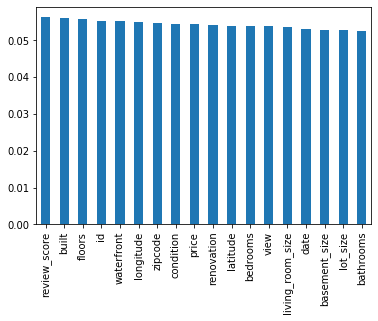

In [11]:
df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [12]:
df[df.isnull().any(axis=1)]

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
12,NaN,28 May 2014,NaN,3.0,NaN,1.5,0.0,NaN,good,5.0,NaN,1927.0,0.0,NaN,NaN,NaN,NaN,12697.0
21,7648006.0,26 August 2014,2000000.0,3.0,2.75,1.0,0.0,4.0,fair,NaN,720.0,1968.0,0.0,98040.0,47.5316,-122.233,4110.0,20336.0
33,6784139.0,10 November 2014,535000.0,3.0,1.00,1.5,0.0,0.0,good,NaN,0.0,1929.0,0.0,98117.0,47.6889,-122.375,1570.0,5080.0
40,6789510.0,None,625000.0,NaN,NaN,NaN,0.0,0.0,None,7.0,NaN,2000.0,0.0,98074.0,47.6145,-122.027,NaN,NaN
42,NaN,None,861990.0,5.0,2.75,2.0,NaN,NaN,None,9.0,NaN,2014.0,0.0,98053.0,47.6848,-122.016,3625.0,NaN
47,7888708.0,None,785000.0,NaN,2.50,NaN,NaN,0.0,None,7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,13685.0
62,NaN,21 October 2014,505000.0,NaN,1.75,NaN,0.0,0.0,None,7.0,NaN,NaN,0.0,NaN,47.4428,NaN,NaN,9500.0
63,6771364.0,07 December 2014,549000.0,3.0,1.75,3.0,0.0,0.0,fair,NaN,0.0,2014.0,0.0,98115.0,47.6765,-122.320,1580.0,3090.0
65,6727436.0,20 November 2014,317625.0,3.0,2.75,1.5,0.0,0.0,excellent,NaN,1000.0,1925.0,0.0,98144.0,47.5747,-122.304,1440.0,4000.0
69,7502204.0,12 June 2014,1325000.0,5.0,2.25,1.0,0.0,0.0,fair,NaN,1600.0,1965.0,0.0,98004.0,47.6303,-122.215,3390.0,20158.0


Statistics check

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECD3589080>,
      dtype=object)

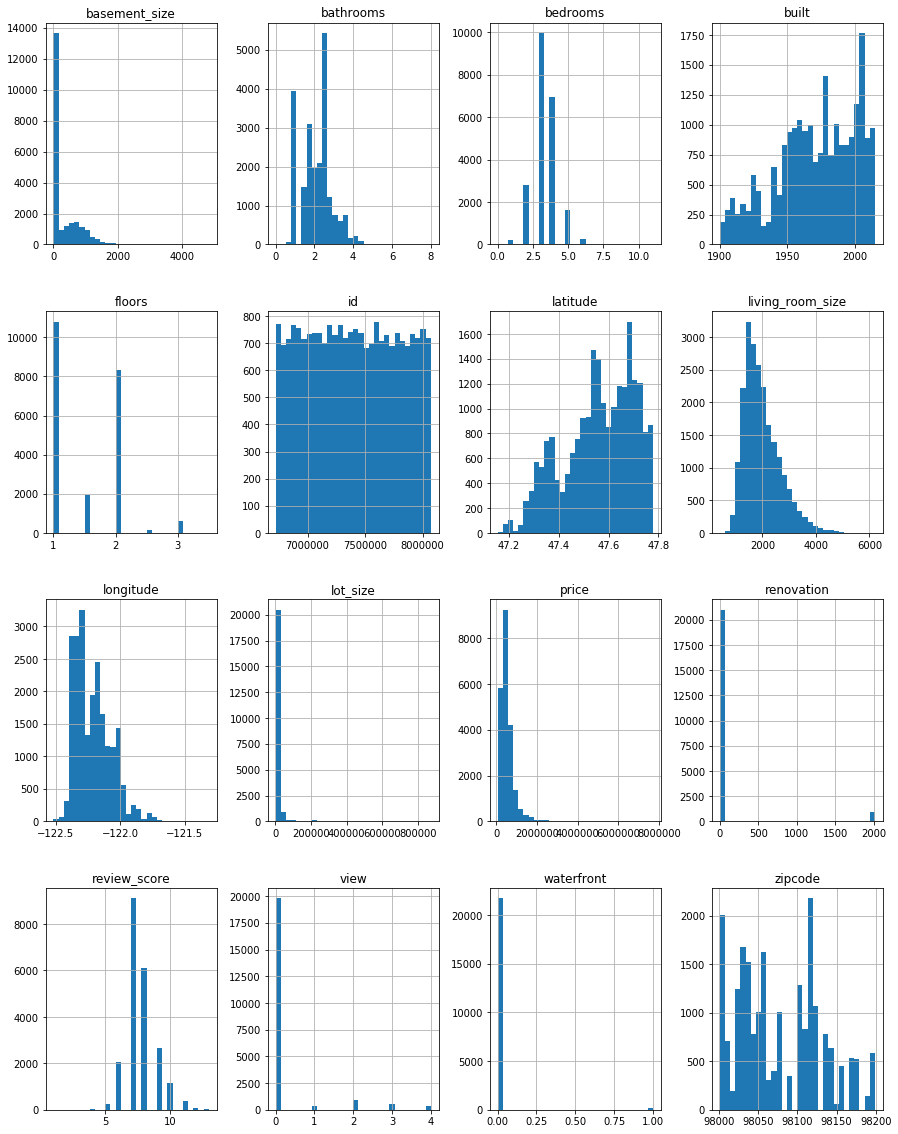

In [13]:
df.hist(figsize = (15,20),bins=30)

Price has some outliers 
- mean (+ or -) 3*std = range of non outlier,
- mean = 5.45e05, std = 3.69e05, max 7.7e06
- 5.4e05 + 3* 3.69e05 = 16.47e05 = 1.647e06

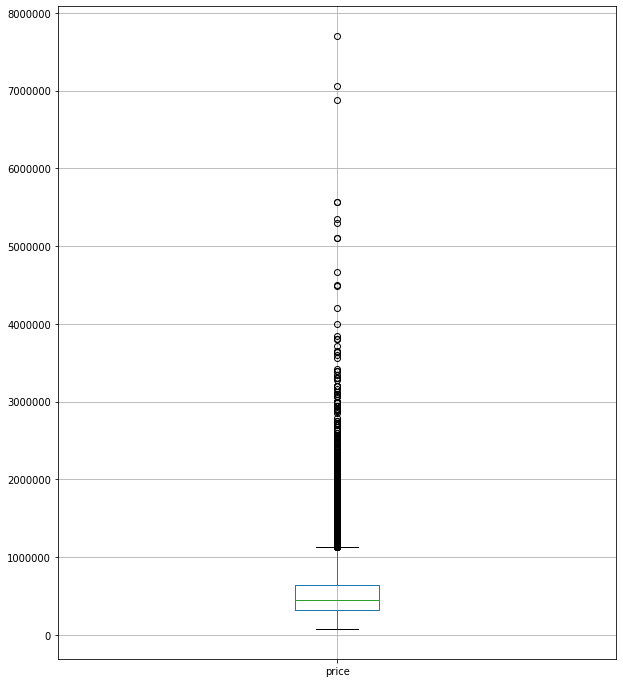

In [14]:
df.boxplot(column='price',figsize = (10,12))

Bathrooms & bedrooms have some outliers 

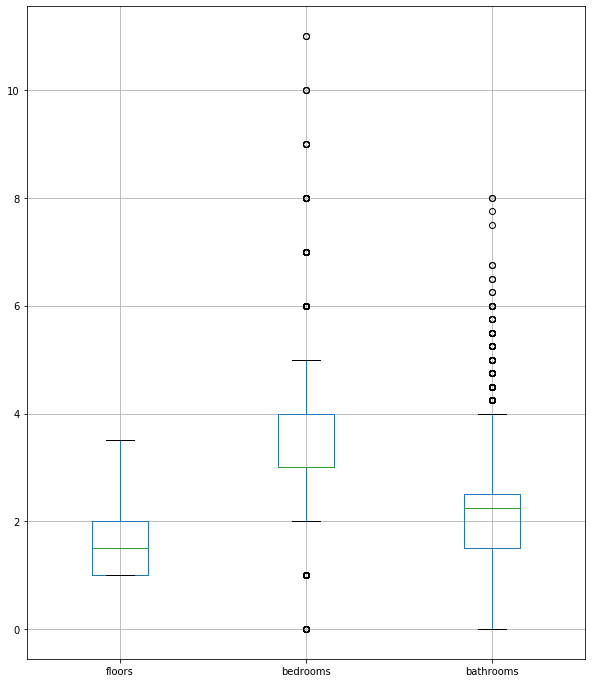

In [15]:
df.boxplot(column=['floors','bedrooms','bathrooms'],figsize = (10,12))

view & review_score have some outliers 

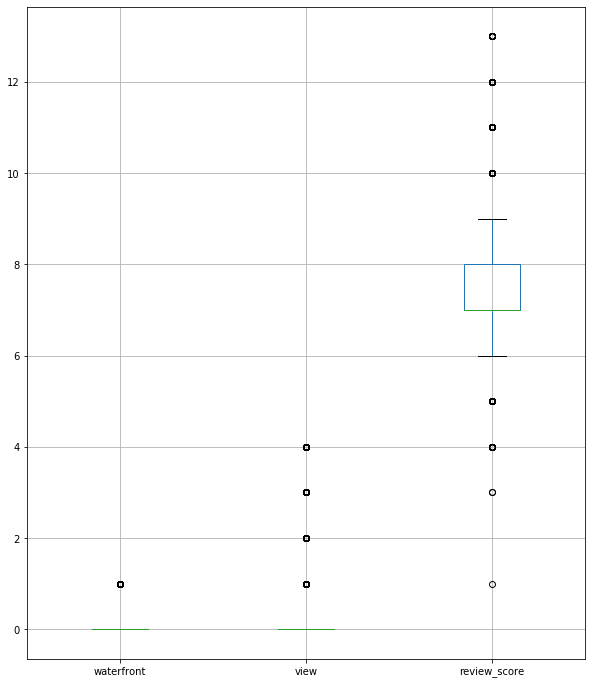

In [16]:
df.boxplot(column=['waterfront','view','review_score'],figsize = (10,12))

Basement_size have quite high number of outliers due to many 0 data (This shhold not be used as features to predict)

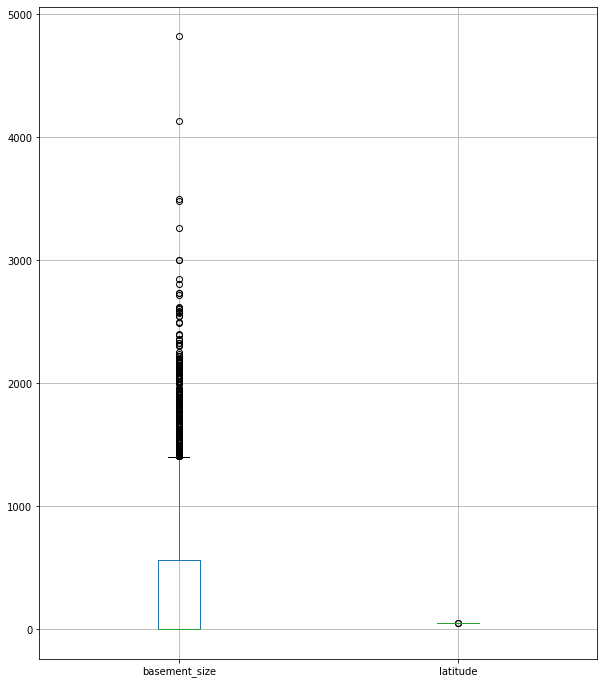

In [17]:
df.boxplot(column=['basement_size','latitude'],figsize = (10,12))

renovation have some extreme outliers due to the many 0 data (Should not be using this feature to predict)

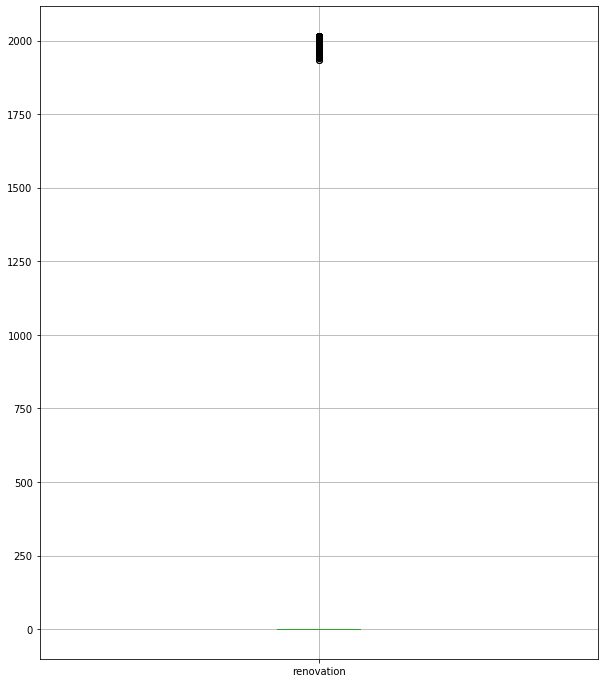

In [18]:
df.boxplot(column='renovation',figsize = (10,12))

Living_room_size have quite number of outliers 

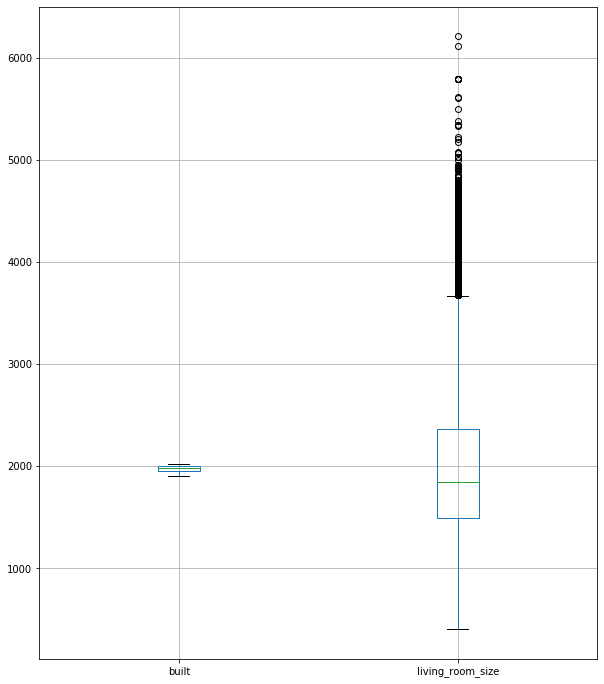

In [19]:
df.boxplot(column=['built','living_room_size'],figsize = (10,12))

### 5.3 Checking on each feature characteristics - How they affect the House Price

#### We can check what are the most highest count for each features that contribute to most of the transactions 

#### 5.3.1 Bedrooms
- As we can see 3 bedroom houses are most commonly sold followed by 4 bedrooms
- 6 bedrooms fetches the highest price follow by 5 bedrooms and lowest for bedroom size like > 10 and <2

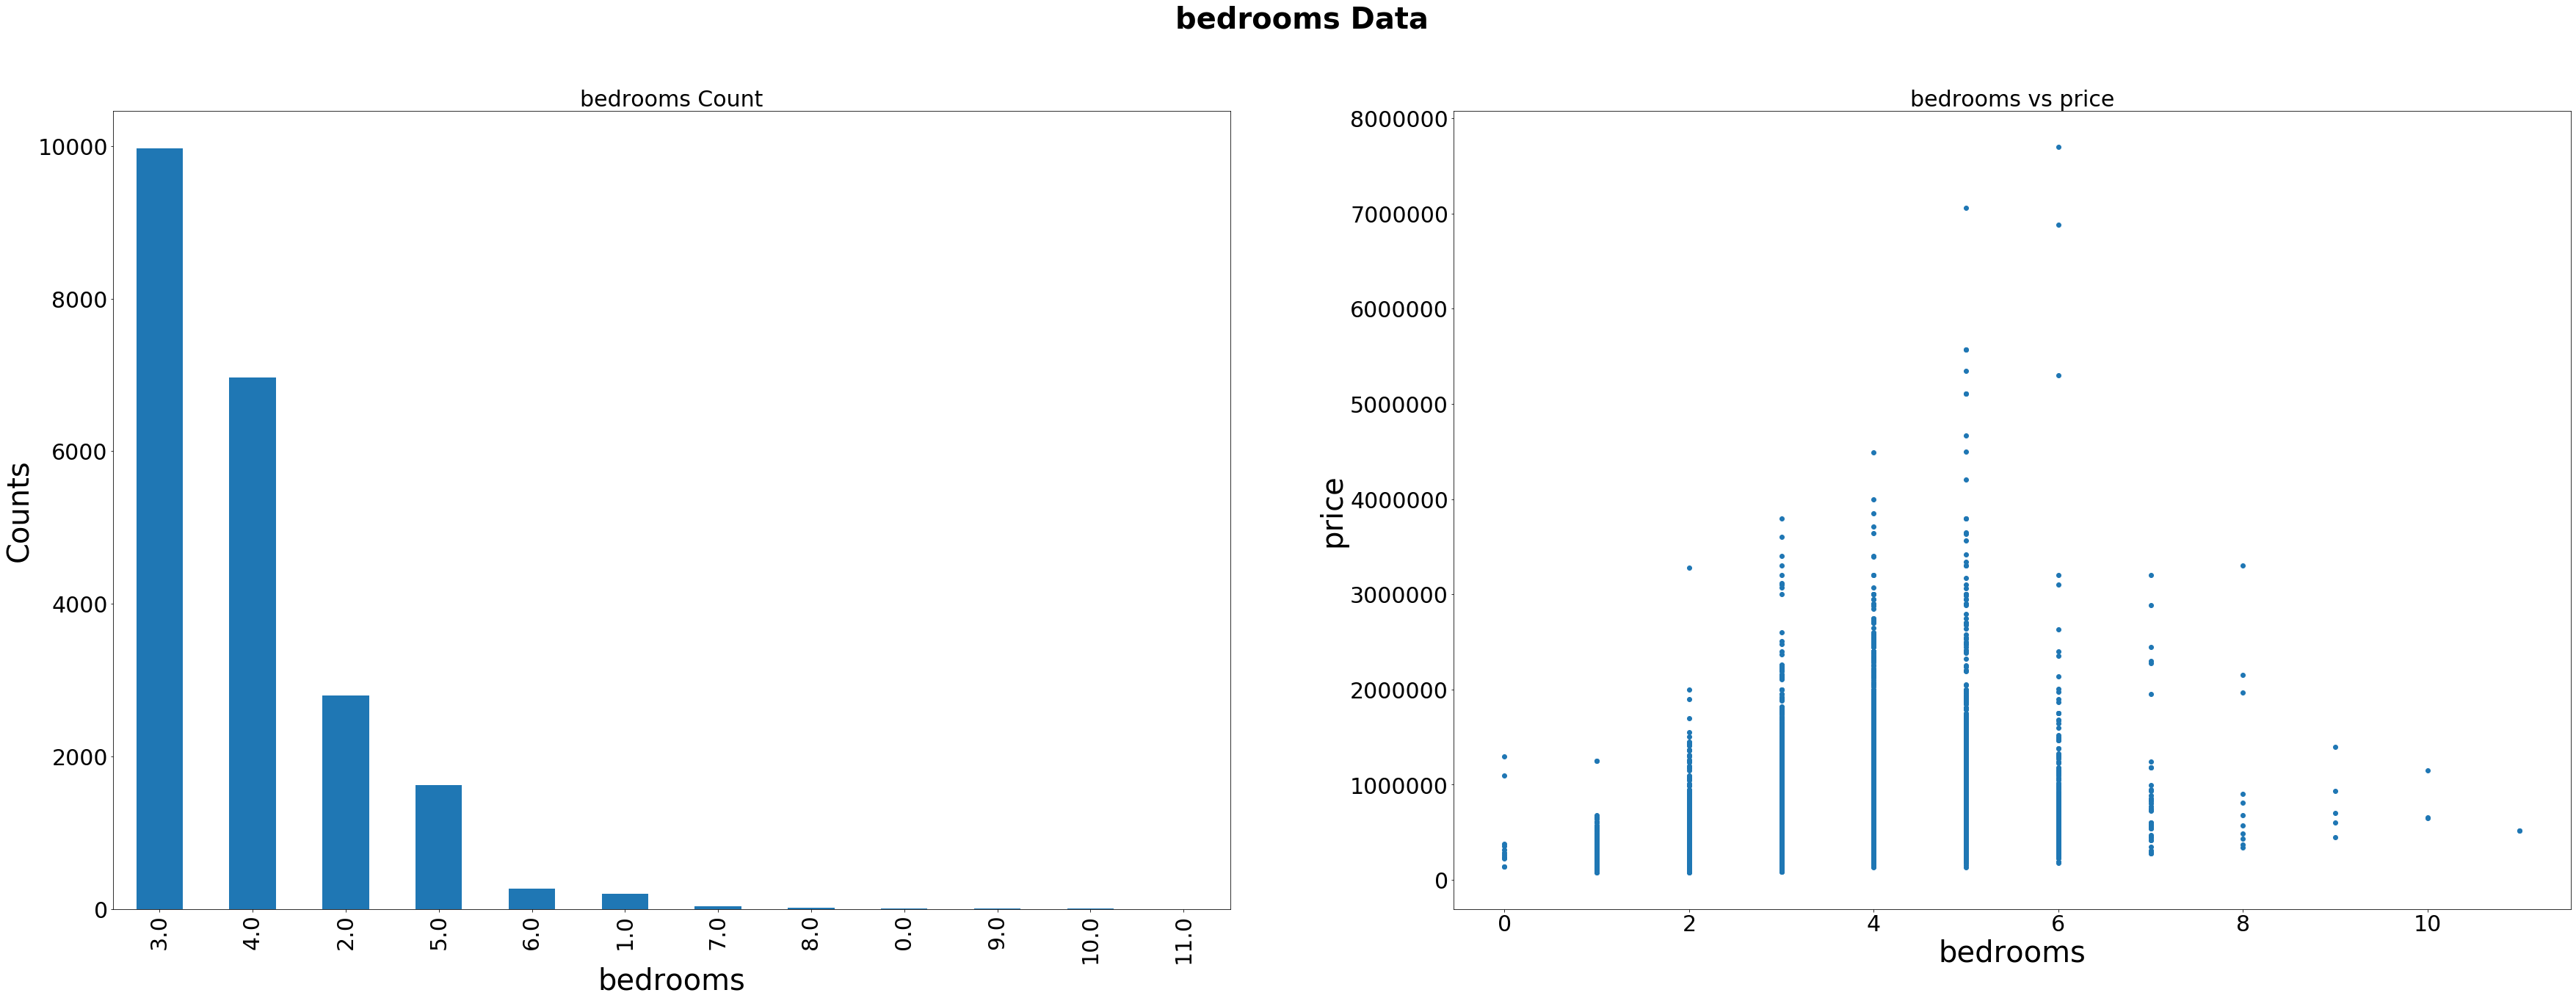

In [20]:
Feature_Plot_Check('bedrooms', 'price')

#### 5.3.2 Bathrooms
- As we can see 2.5 bathroom houses are most commonly sold followed by 1 bathroom
- In general, 4 to 5 bathrooms fetches high price for the housebut most transaction concentrated between 2 to 4 bathrooms

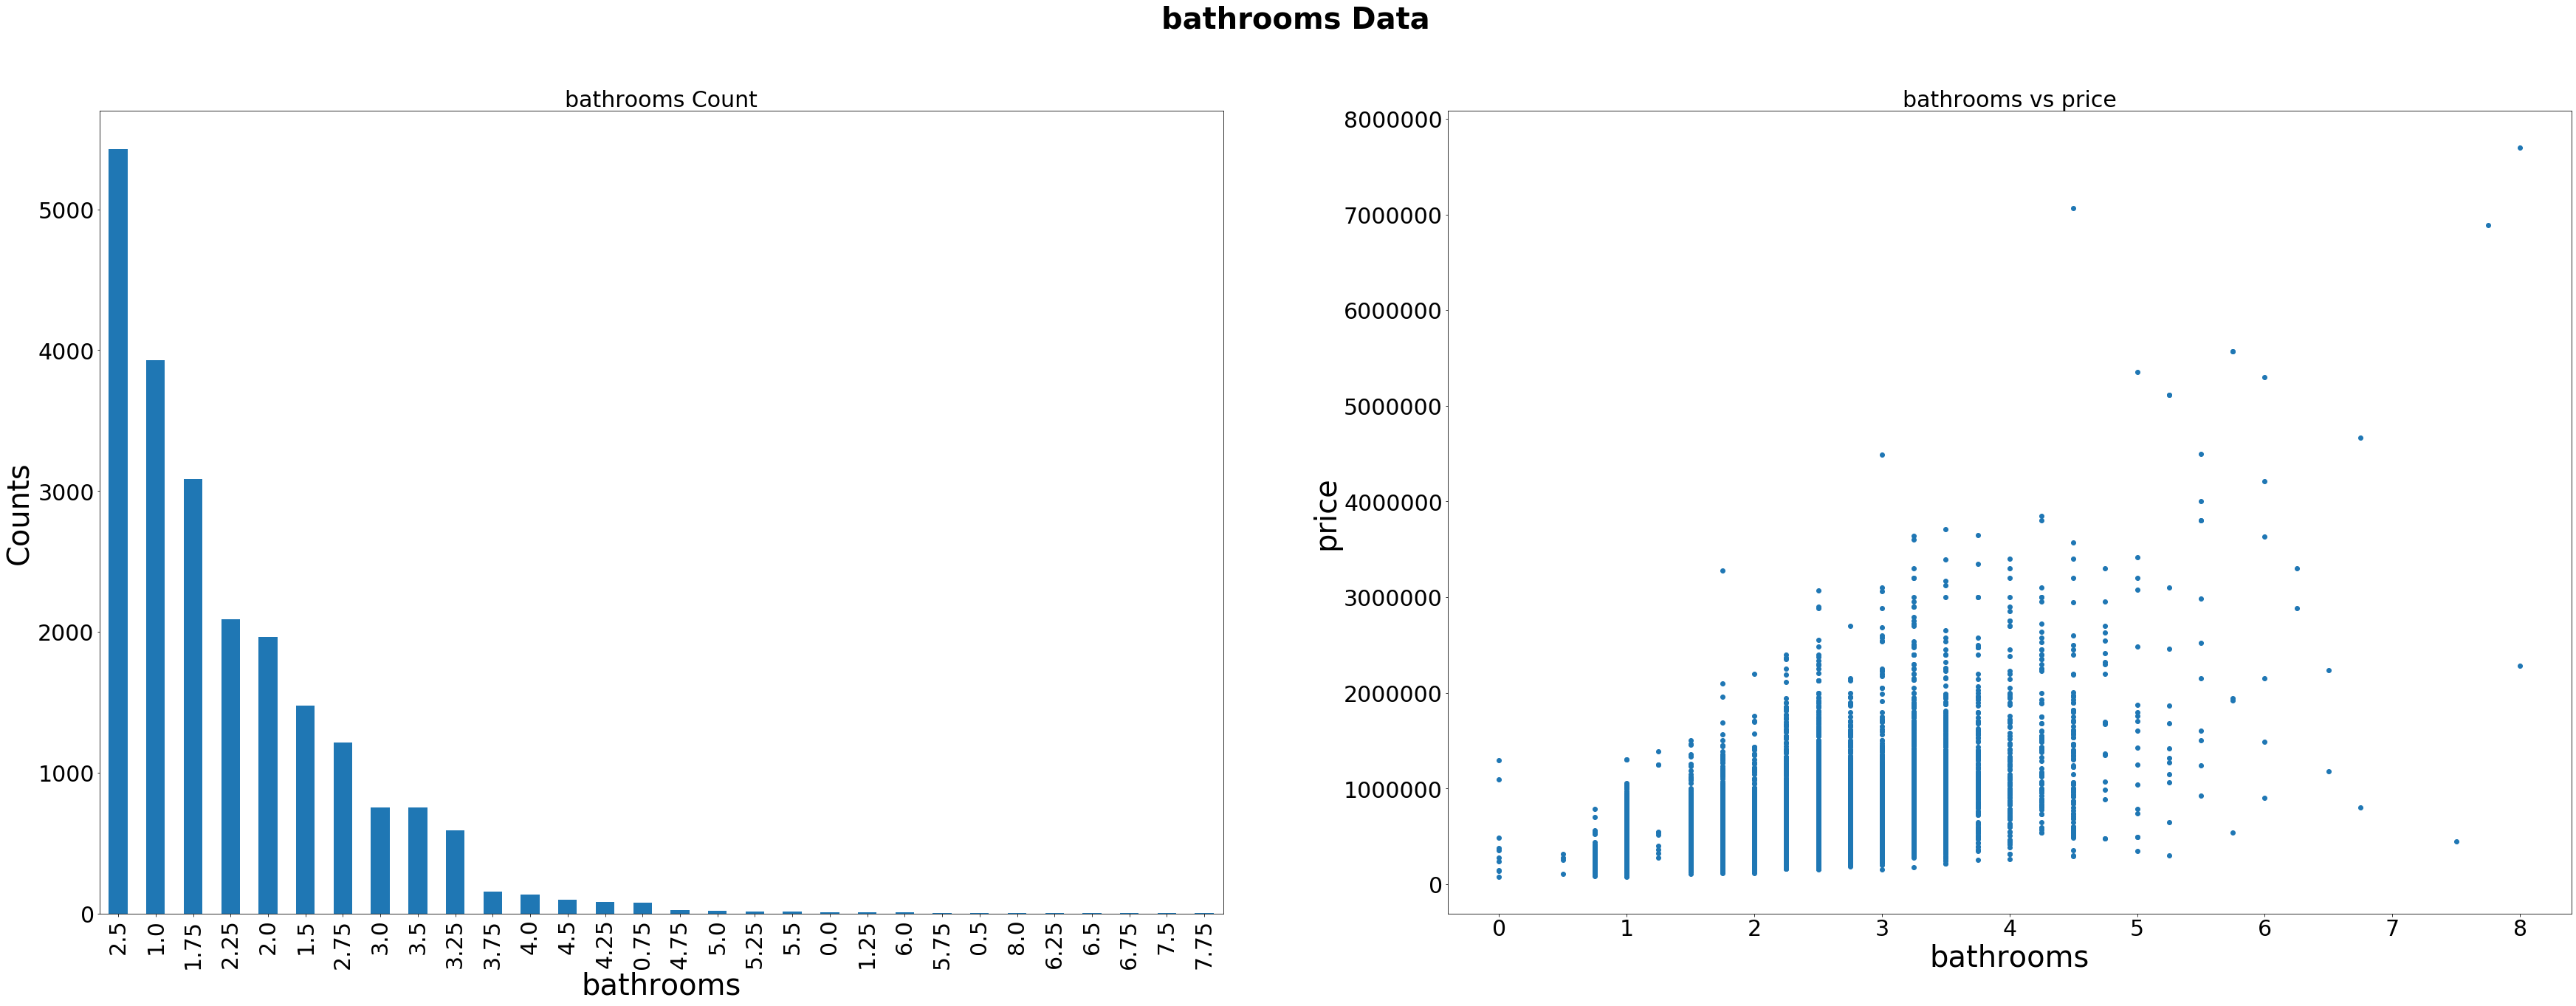

In [21]:
Feature_Plot_Check('bathrooms', 'price')

#### 5.3.3 Floors
- As we can see 1 floor houses are most commonly sold followed by 2 floors
- 2 floors fetches the highest price for the house follow by 1 floor houses

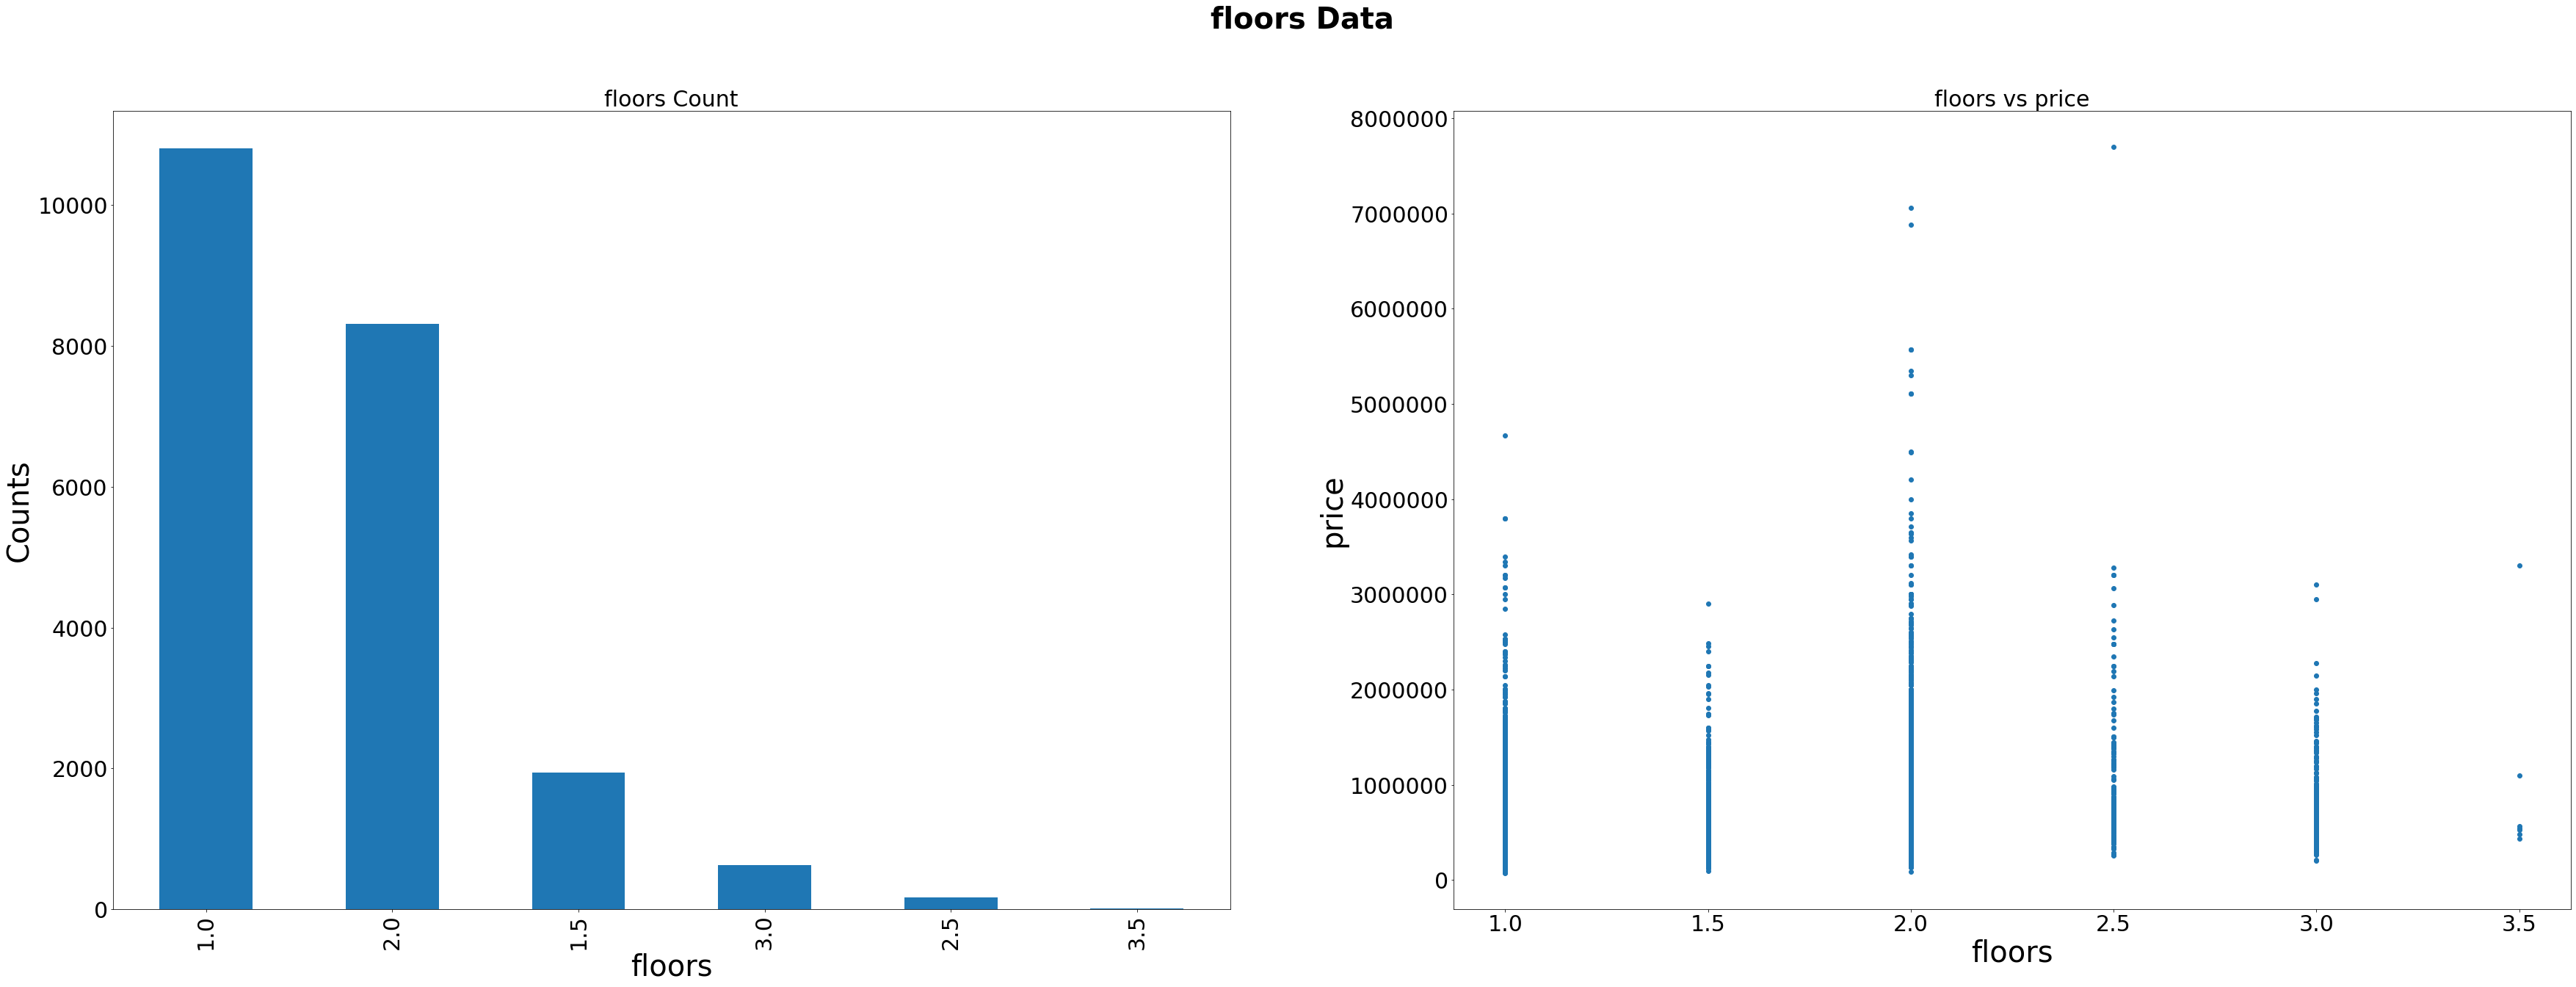

In [22]:
Feature_Plot_Check('floors', 'price')

#### 5.3.4 waterfront
- As we can see 0 indicate no waterfront which contain most of the transactions - most prefer no waterfront ?
- Both with or without waterfront command similiar pricing
- This shows no differentiation between choices of with or without waterfront since both sahre the similar pricing demand but without waterfronts seems to has the major transactions

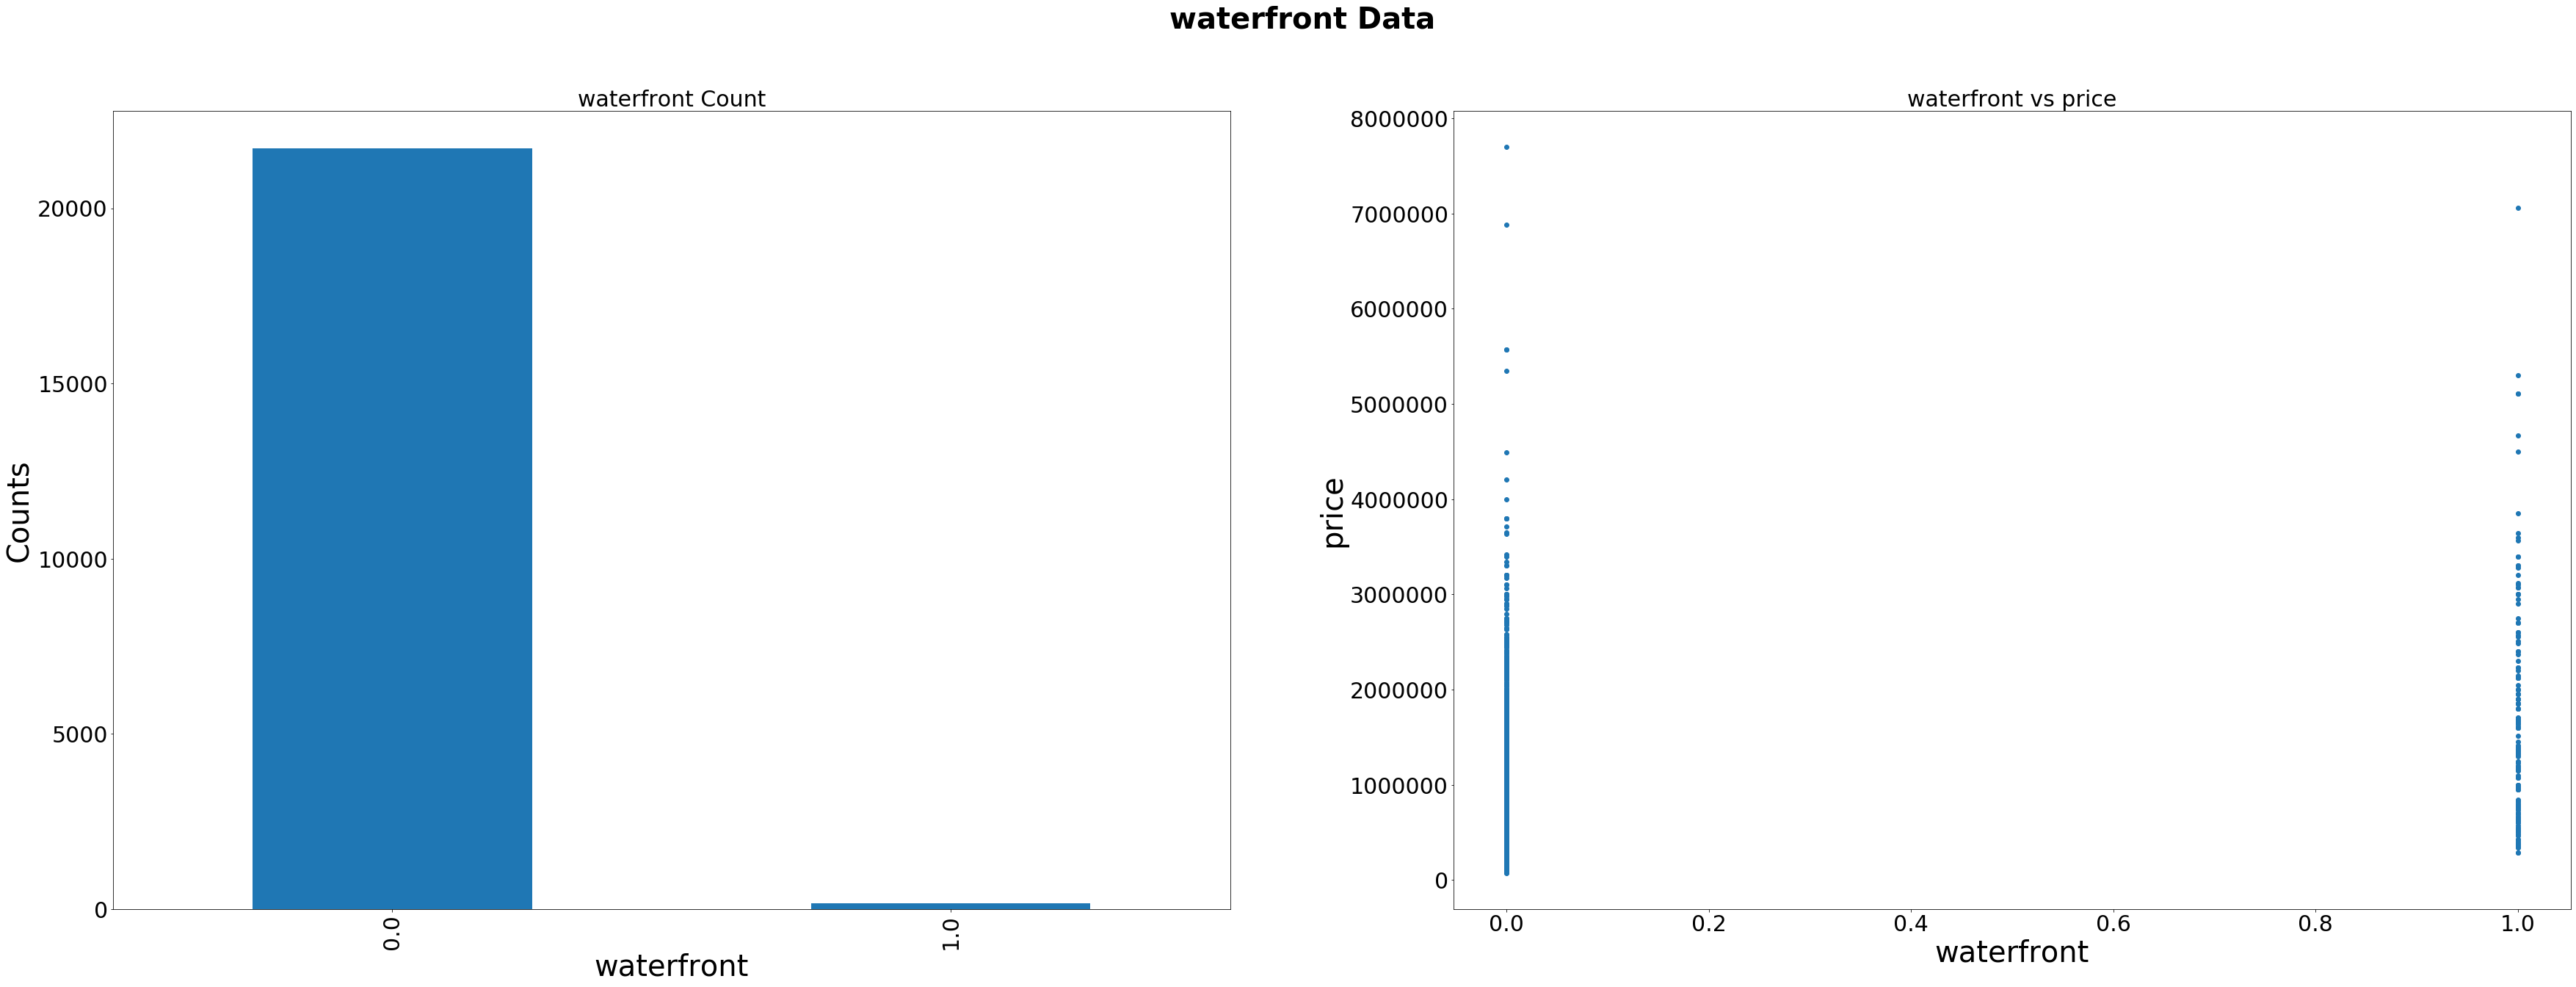

In [23]:
Feature_Plot_Check('waterfront', 'price')

#### 5.3.5 view
- As we can see internal rating view of the hosue with 0 has the highest transactions
- Almost all view command similiar pricing - seem like this feature does not really have big impact on the pricing

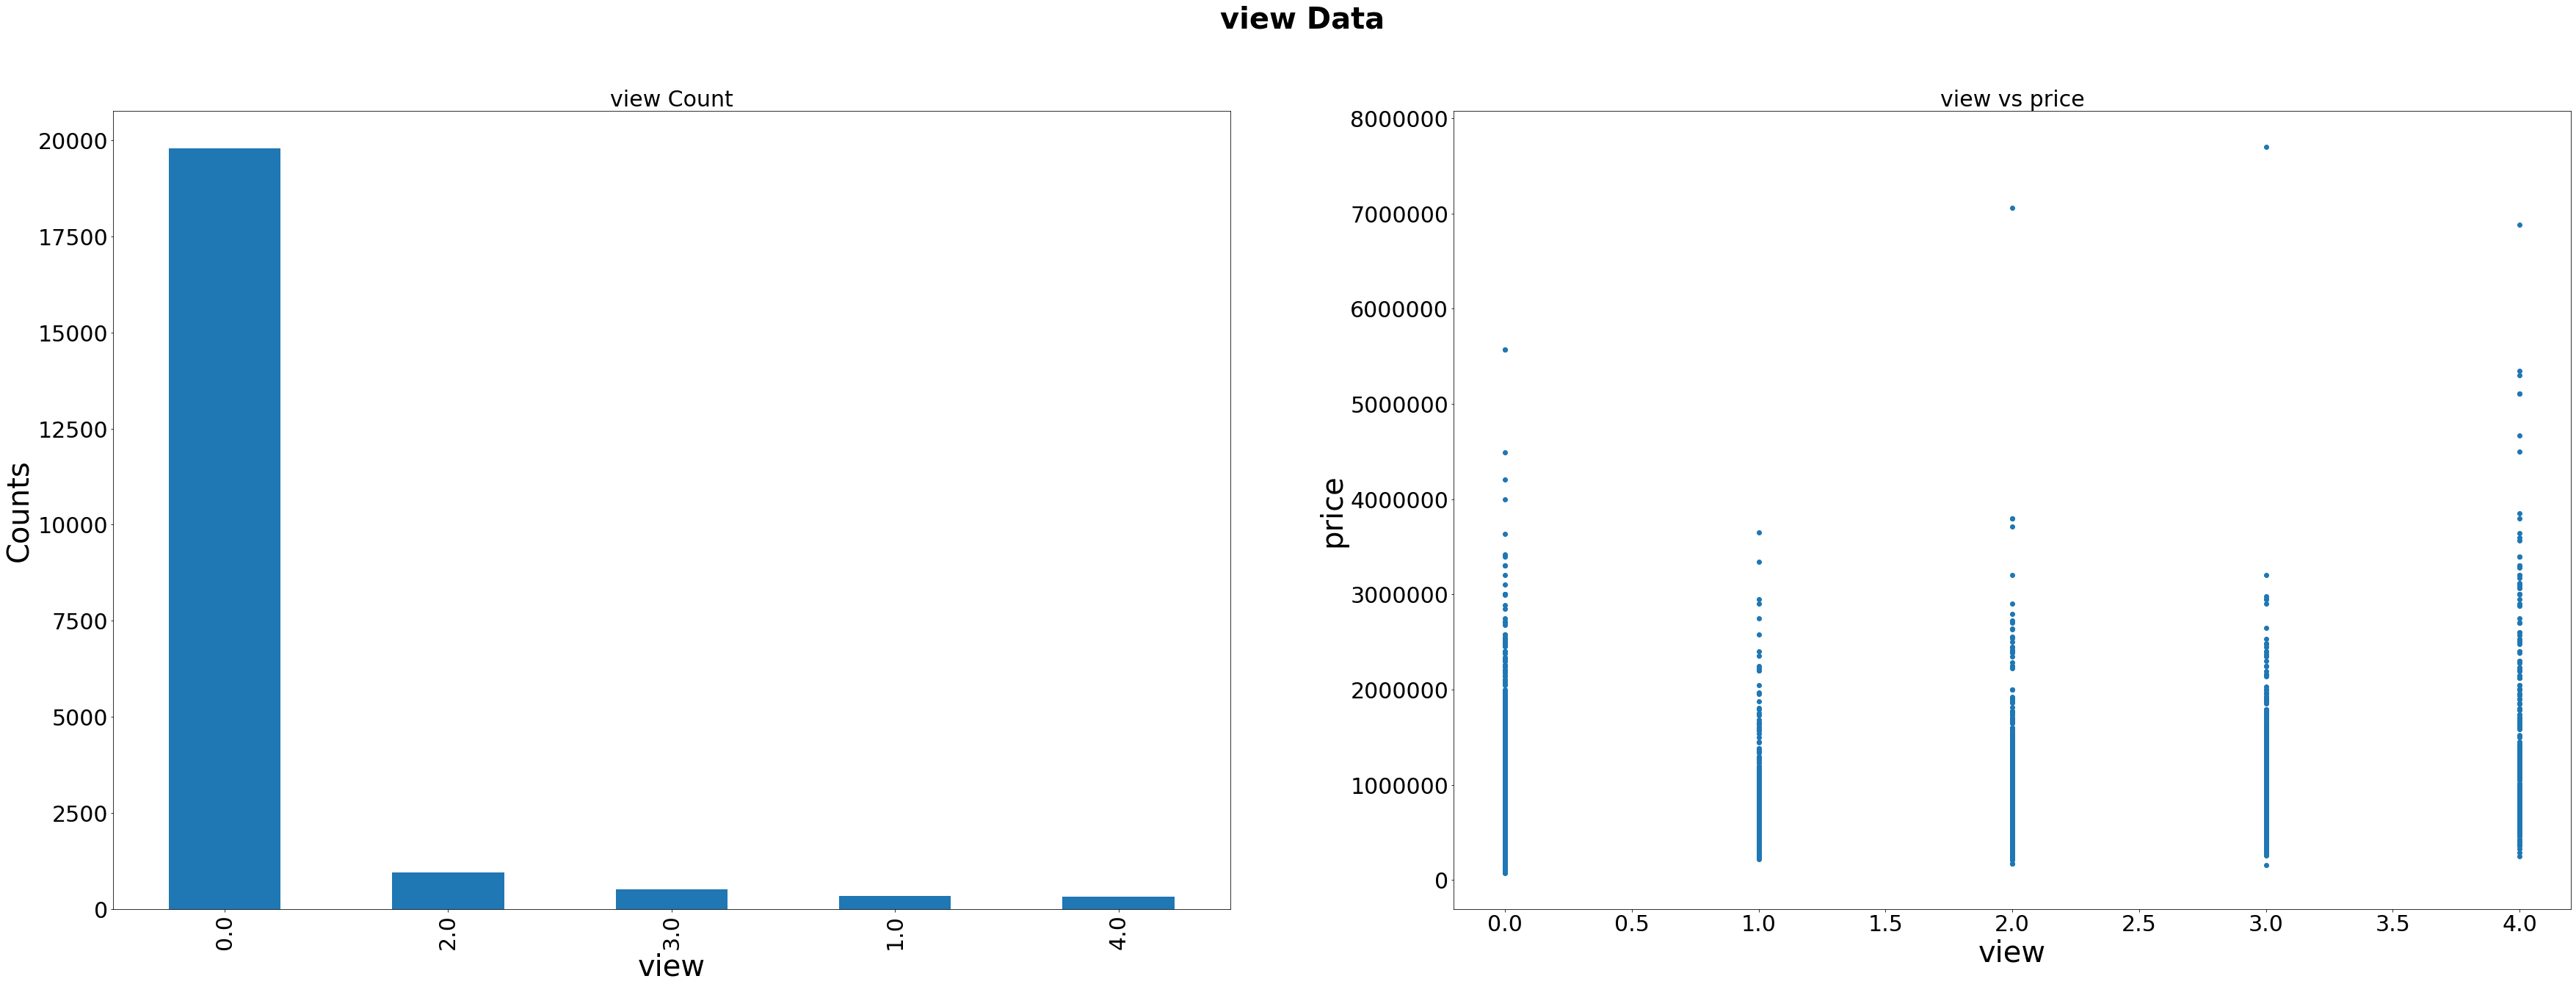

In [24]:
Feature_Plot_Check('view', 'price')

#### 5.3.6 condition
- As we can see fair condition has the highest transactions follow by good conditions
- In general fair and good condition housing pricing has the highest and of course we expect low pricing for the terrible condition but excellant condition doesn't really reflect the price demand
- This indicate not much motivation for excellant condition housing to fetch high price

In [25]:
df.condition.value_counts()

fair         13104
good          5276
excellent     1557
FAIR          1107
GOOD           481
poor           160
EXCELLENT      159
terrible        30
POOR            14
TERRIBLE         2
Name: condition, dtype: int64

In [9]:
df['condition'] = df.condition.str.lower()

In [10]:
df.condition.value_counts()

fair         14211
good          5757
excellent     1716
poor           174
terrible        32
Name: condition, dtype: int64

In [11]:
# For Ordinal Label data

le = LabelEncoder()
df['condition_cat'] = le.fit_transform(df.condition.astype(str))

In [12]:
for j, item in enumerate(le.classes_):
        print(item, '-->', j)

None --> 0
excellent --> 1
fair --> 2
good --> 3
poor --> 4
terrible --> 5


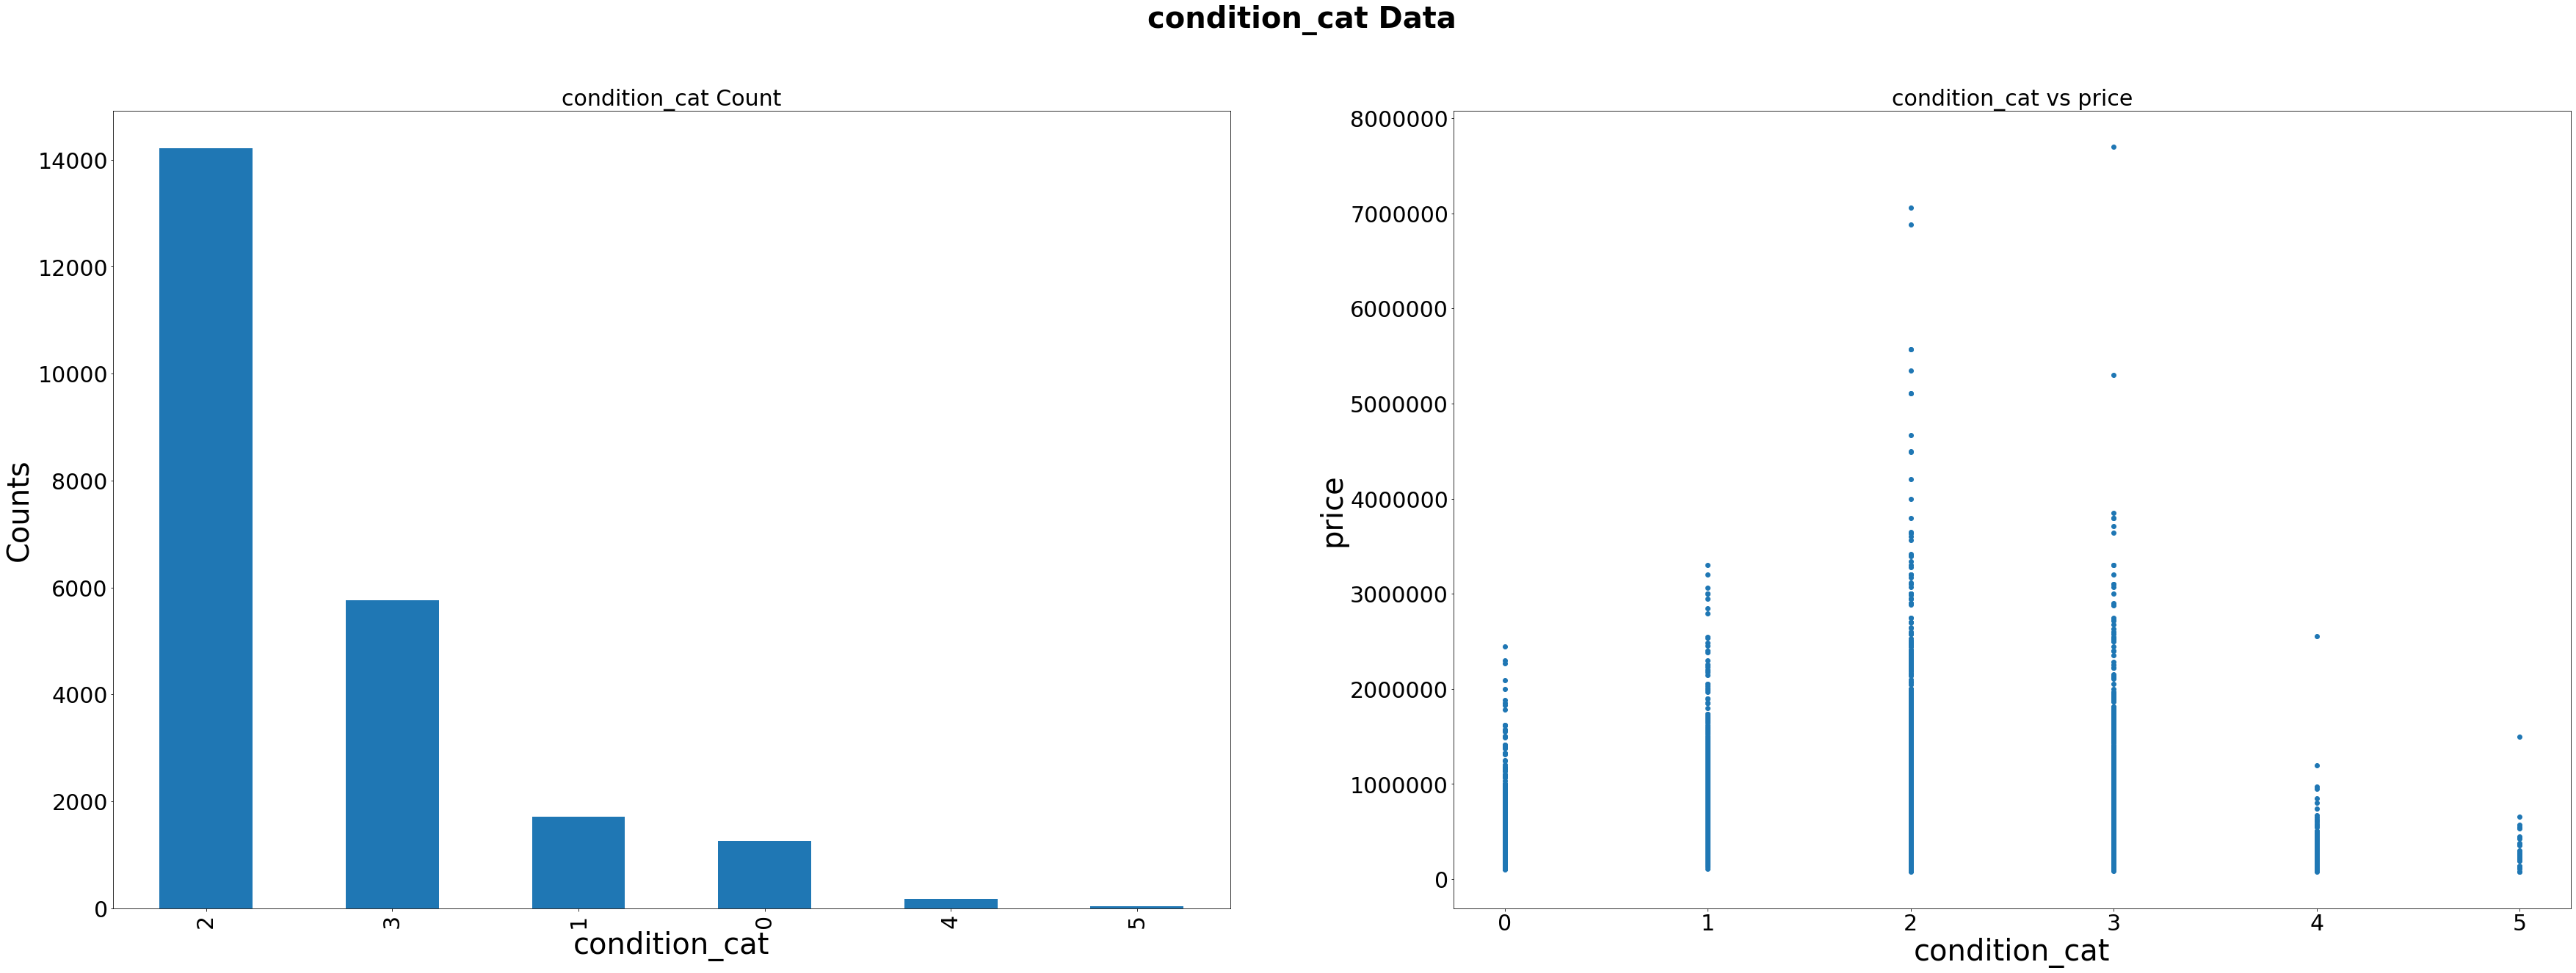

In [30]:
Feature_Plot_Check('condition_cat', 'price')

#### 5.3.7 review_score
- As we can see review score of 7 has the highest transactions follow by 8
- In general score review of 6 to 8 has the concentration of housing pricing demand and of course we expect low pricing for the low score but top score doesn't really reflect the price demand

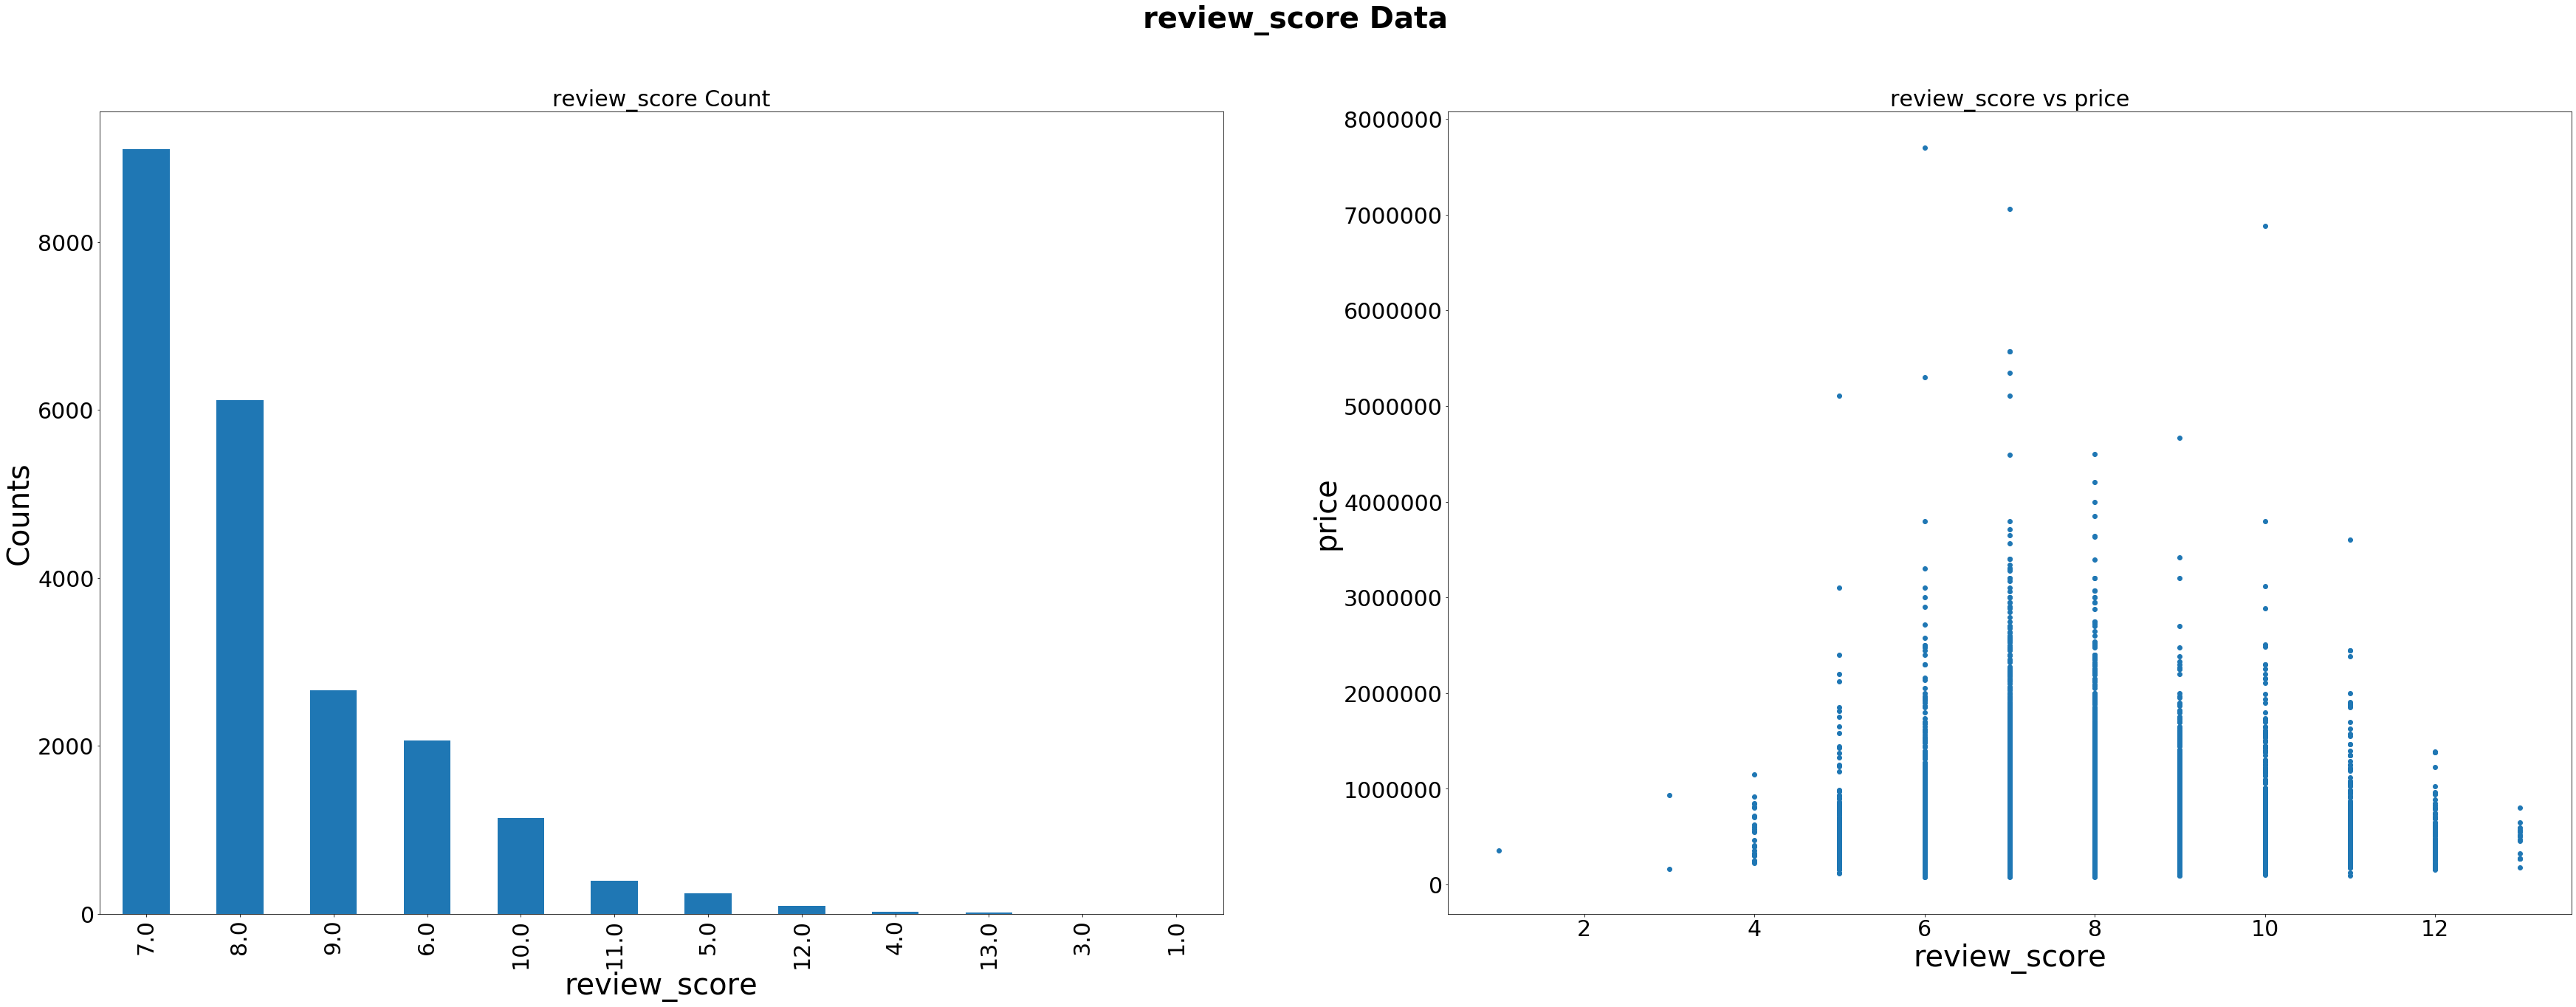

In [31]:
Feature_Plot_Check('review_score', 'price')

#### 5.3.8 basement_size
- As we can see basement_size of 600 has the highest transactions and is rnage is from 0 to 4820 sqft and has 13302 null data. This feature should not be used for predicting.
- Most of the price transacted are below $2m concentrated in the basement size between 0 to 2000 sqft

In [32]:
df.basement_size.value_counts()

0.0       13302
600.0       227
500.0       223
700.0       219
800.0       206
400.0       188
1000.0      156
300.0       152
900.0       144
200.0       111
530.0       111
480.0       111
450.0       109
750.0       106
720.0       103
620.0        91
580.0        91
1100.0       87
840.0        87
650.0        80
380.0        79
420.0        78
780.0        78
240.0        78
860.0        78
550.0        77
680.0        77
850.0        77
670.0        76
910.0        76
          ...  
3480.0        1
2600.0        1
1008.0        1
274.0         1
2850.0        1
602.0         1
1135.0        1
2240.0        1
415.0         1
143.0         1
243.0         1
862.0         1
2180.0        1
172.0         1
225.0         1
2490.0        1
935.0         1
1990.0        1
1245.0        1
2590.0        1
2500.0        1
1548.0        1
518.0         1
915.0         1
266.0         1
1930.0        1
588.0         1
1920.0        1
2390.0        1
2620.0        1
Name: basement_size, Len

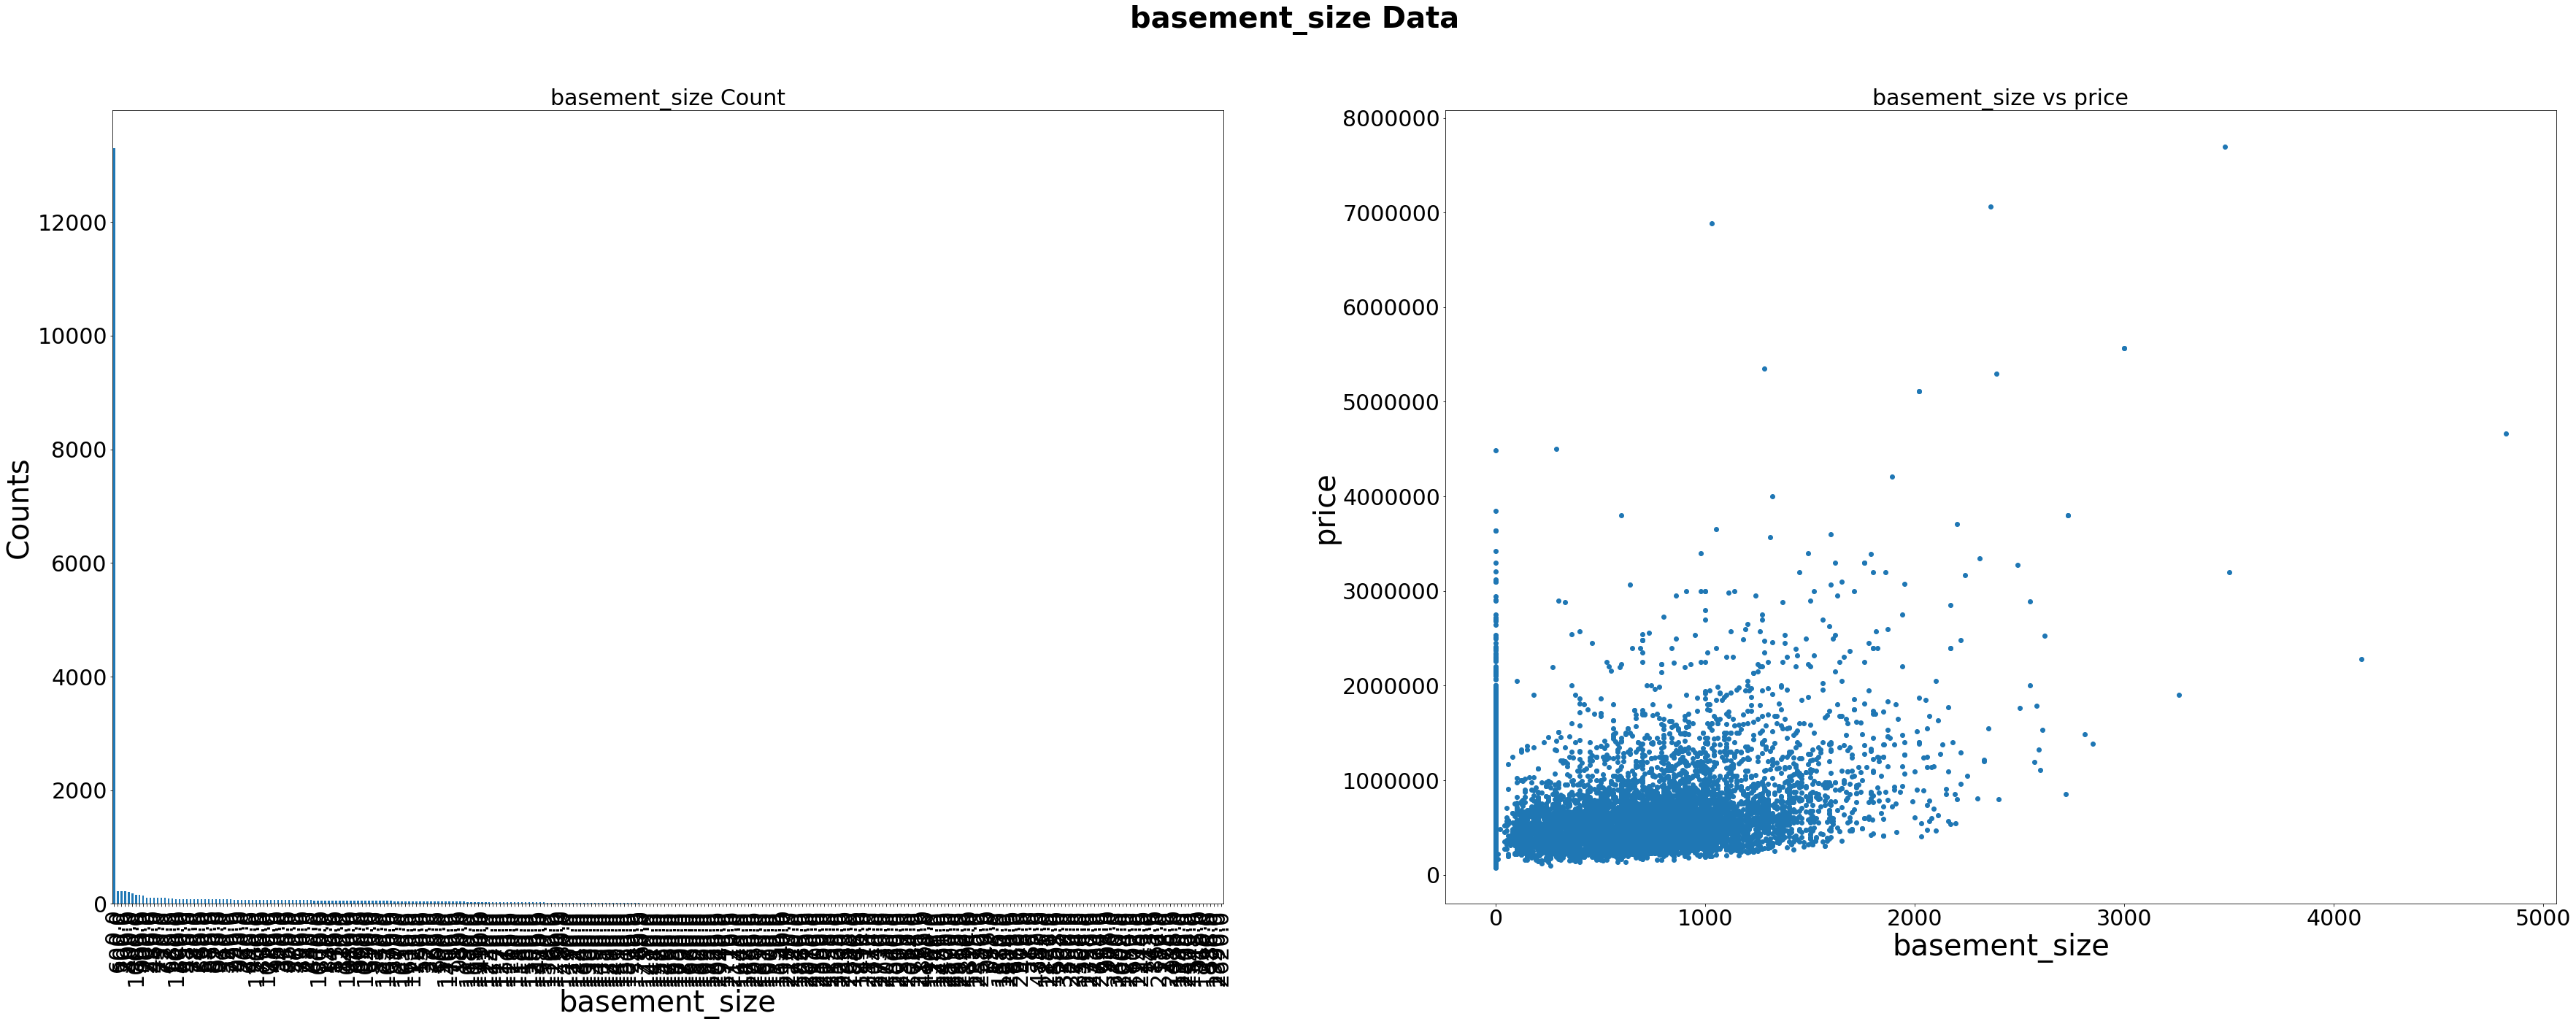

In [33]:
Feature_Plot_Check('basement_size', 'price')

#### 5.3.9 built
- As we can see built year of 2014 has the highest transactions and is rnage is from year 1900 to 2015. This shows that mmost prefer new housing
- In genearl the pricing shares similiar pattern for all built years 

In [34]:
df.built.value_counts()

2014.0    573
2006.0    455
2005.0    455
2004.0    433
2003.0    423
1977.0    422
2007.0    422
1978.0    396
1968.0    386
2008.0    378
1967.0    359
1979.0    343
1959.0    328
1990.0    321
1962.0    314
2001.0    307
1954.0    301
1987.0    294
1969.0    292
1989.0    291
1999.0    275
1988.0    273
1955.0    273
1947.0    269
1963.0    265
1950.0    261
1994.0    257
1976.0    256
1966.0    254
1960.0    253
         ... 
1906.0     93
1909.0     91
1930.0     88
1908.0     87
1923.0     87
1919.0     84
1900.0     83
1911.0     80
1912.0     79
1905.0     79
1921.0     77
1916.0     76
1907.0     69
1937.0     68
1915.0     64
1931.0     64
1914.0     57
1913.0     56
1917.0     56
1938.0     54
1904.0     47
1903.0     47
2015.0     39
1936.0     39
1932.0     38
1933.0     33
1901.0     29
1902.0     26
1935.0     25
1934.0     21
Name: built, Length: 116, dtype: int64

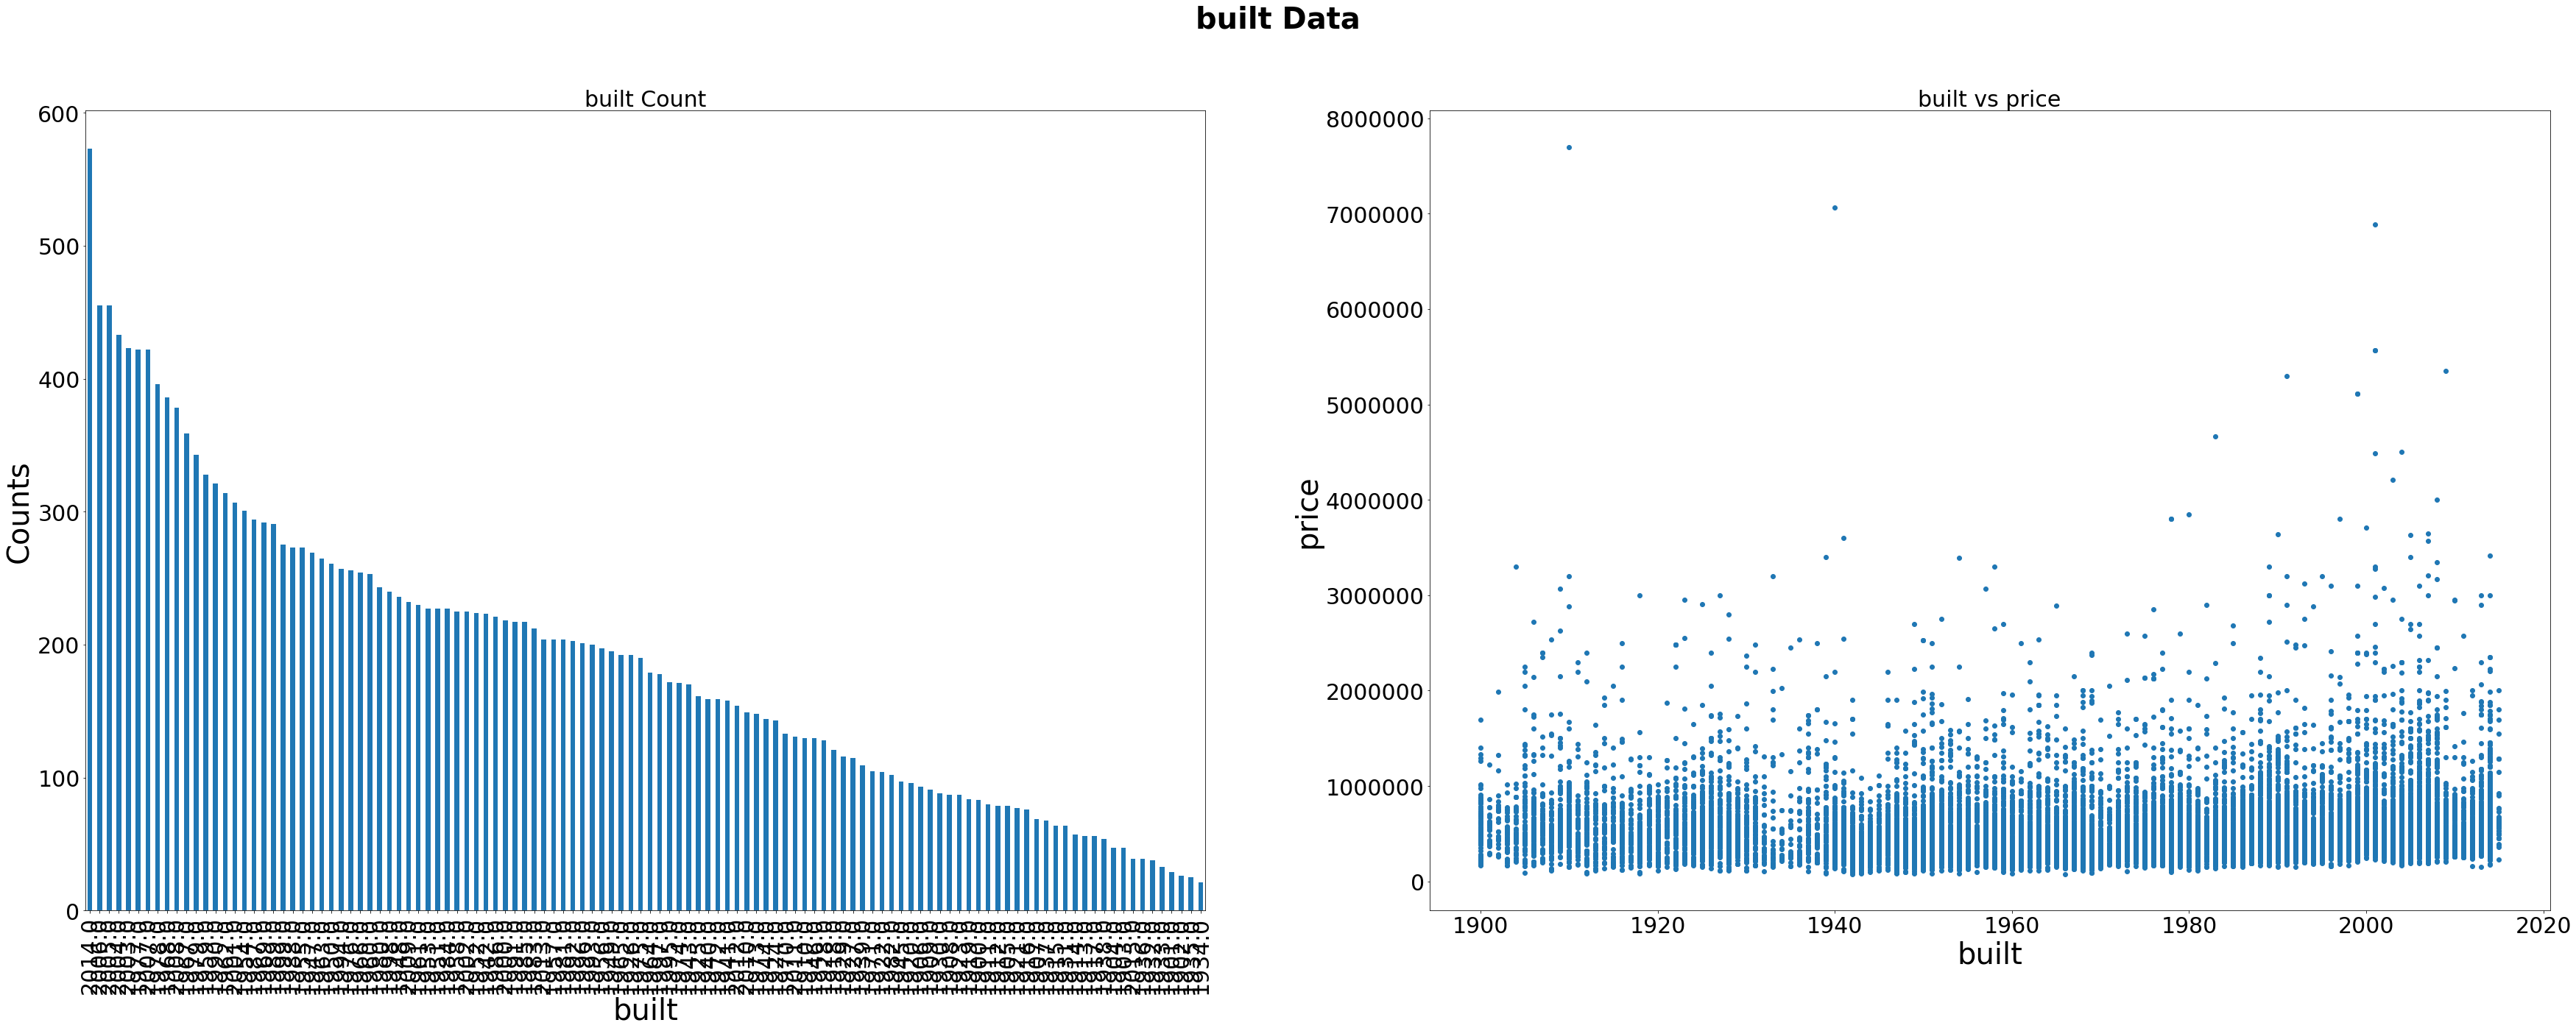

In [35]:
Feature_Plot_Check('built', 'price')

#### 5.3.10 renovation
- As we can see renovation year of 2014 has the highest transactions and is range is from year 0 to 2015 and has 20963 0 data. This feature should not be used for predicting.

In [36]:
df.renovation.value_counts()

0.0       20963
2014.0       88
2005.0       38
2013.0       38
2000.0       36
2003.0       36
2007.0       35
2004.0       28
1990.0       27
2009.0       26
1984.0       25
2006.0       23
1989.0       23
2001.0       23
1991.0       22
2002.0       21
1998.0       20
1993.0       20
1992.0       19
2010.0       19
1994.0       18
2008.0       18
1983.0       18
1995.0       17
1999.0       17
1985.0       17
1987.0       16
2015.0       16
1997.0       15
1986.0       15
          ...  
1975.0        7
1965.0        6
1981.0        6
1973.0        5
1958.0        5
1969.0        5
1964.0        5
1957.0        4
1972.0        4
1963.0        4
1960.0        4
1978.0        4
1974.0        3
1953.0        3
1955.0        3
1976.0        3
1956.0        3
1945.0        3
1946.0        2
1971.0        2
1934.0        2
1962.0        2
1940.0        2
1944.0        1
1967.0        1
1948.0        1
1950.0        1
1954.0        1
1959.0        1
1951.0        1
Name: renovation, Length

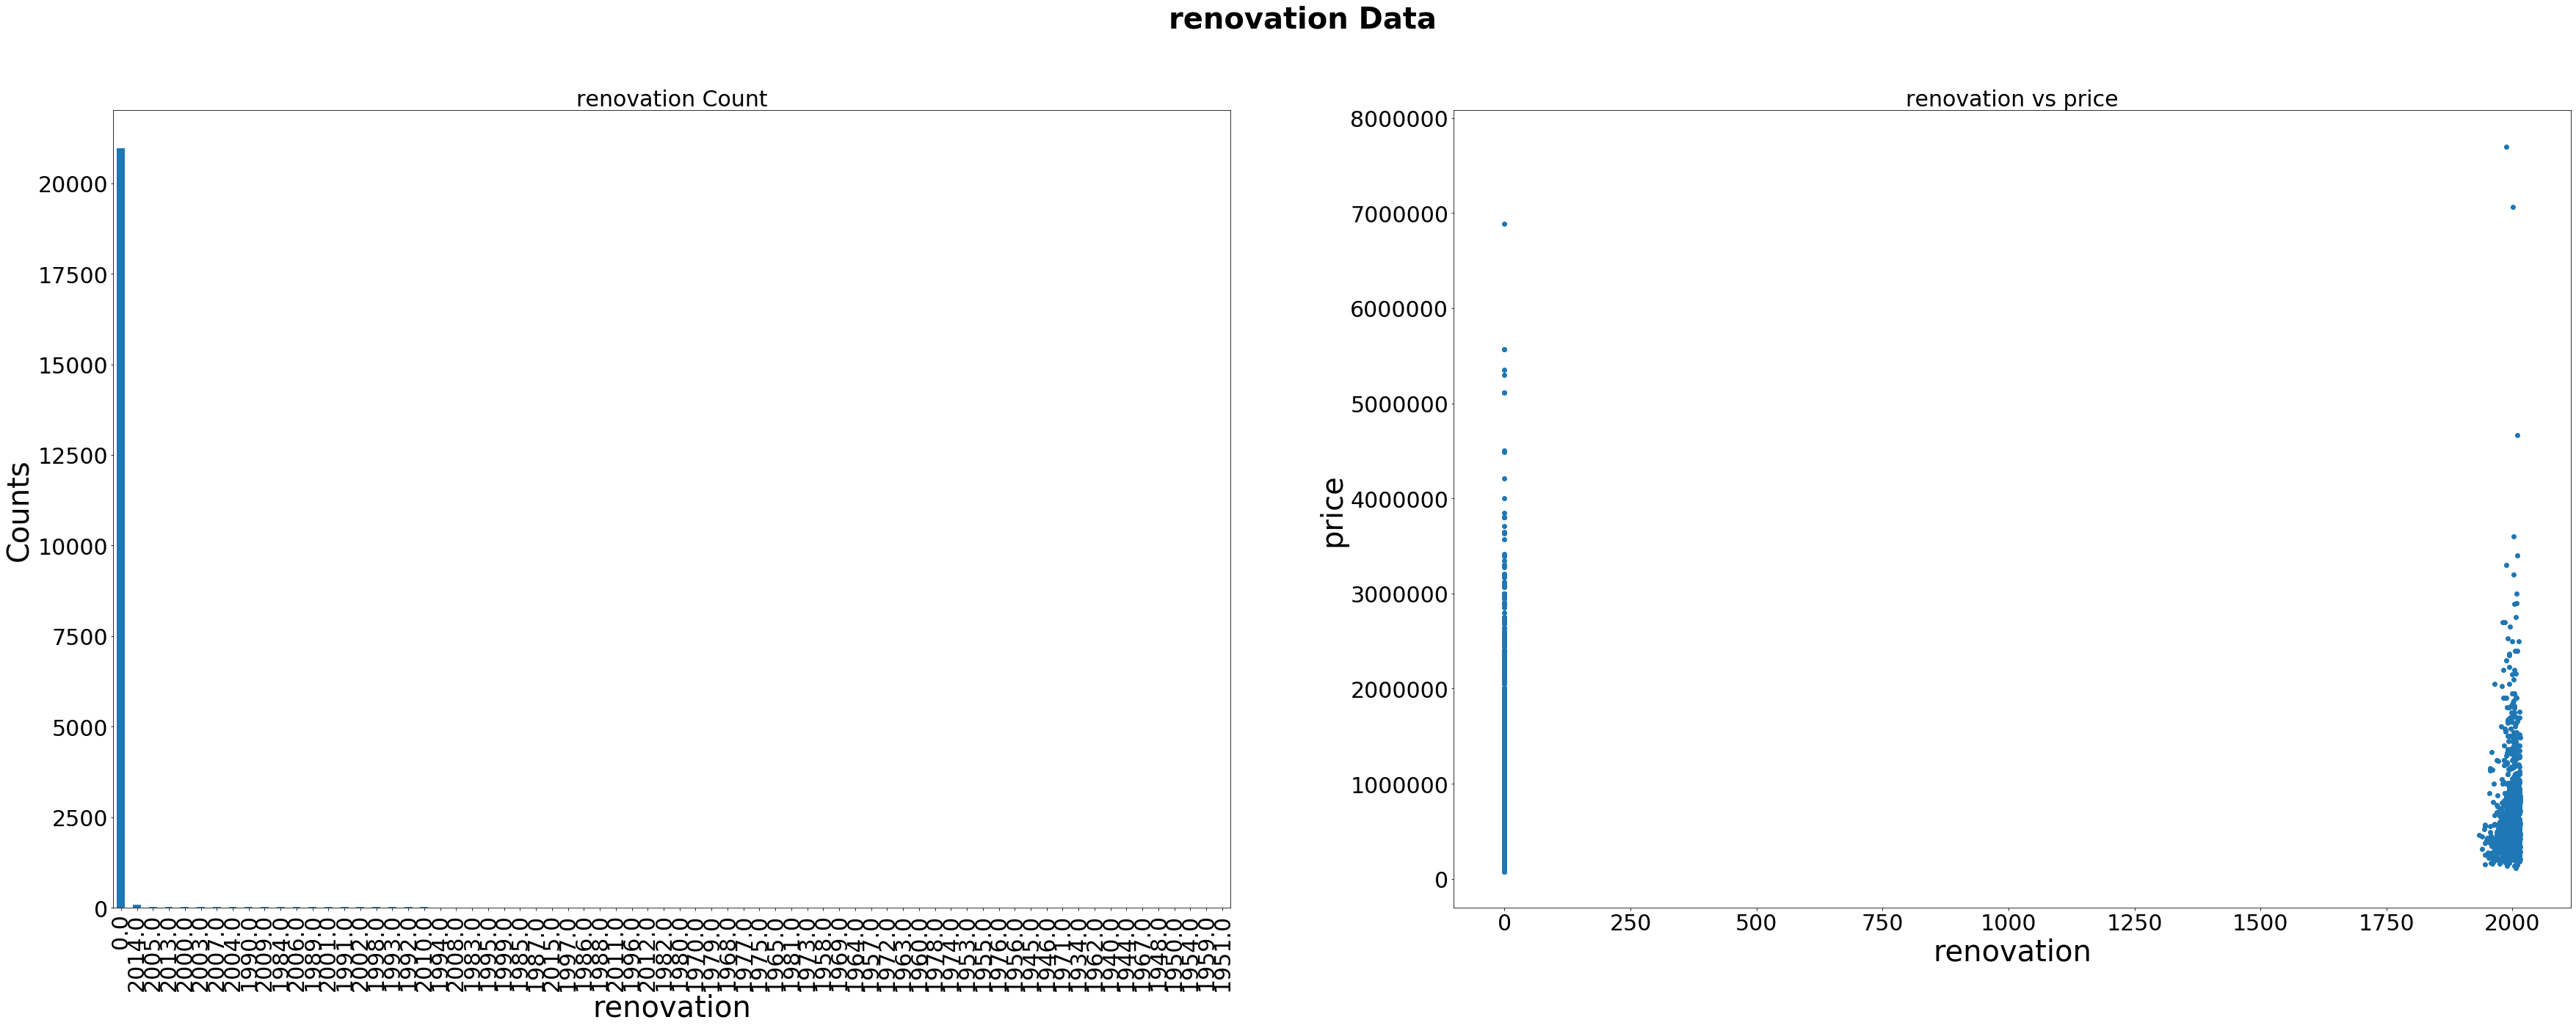

In [37]:
Feature_Plot_Check('renovation', 'price')

#### 5.3.11 zipcode
- As we can see zipcode of 98103 & 98038 share the highest transactions and is range is from 98000 to 98200 
- Most share the similiar pricing pattern except for some from range 98000 to 98010 and 9803X has some outliers of high pricing

In [38]:
df.zipcode.value_counts()

98103.0    611
98038.0    611
98115.0    593
98052.0    587
98034.0    568
98042.0    552
98117.0    551
98118.0    515
98023.0    510
98133.0    508
98006.0    501
98059.0    476
98058.0    462
98155.0    455
98074.0    445
98033.0    437
98053.0    422
98027.0    416
98125.0    414
98056.0    410
98001.0    374
98075.0    363
98126.0    358
98144.0    349
98092.0    348
98106.0    339
98116.0    330
98029.0    325
98004.0    318
98199.0    315
          ... 
98107.0    273
98055.0    273
98136.0    273
98031.0    268
98112.0    266
98178.0    264
98166.0    262
98177.0    255
98030.0    240
98022.0    231
98105.0    226
98045.0    225
98002.0    206
98077.0    198
98011.0    194
98019.0    190
98108.0    189
98119.0    187
98005.0    171
98007.0    146
98188.0    140
98032.0    129
98014.0    123
98070.0    120
98102.0    114
98109.0    104
98010.0     99
98024.0     83
98148.0     59
98039.0     52
Name: zipcode, Length: 70, dtype: int64

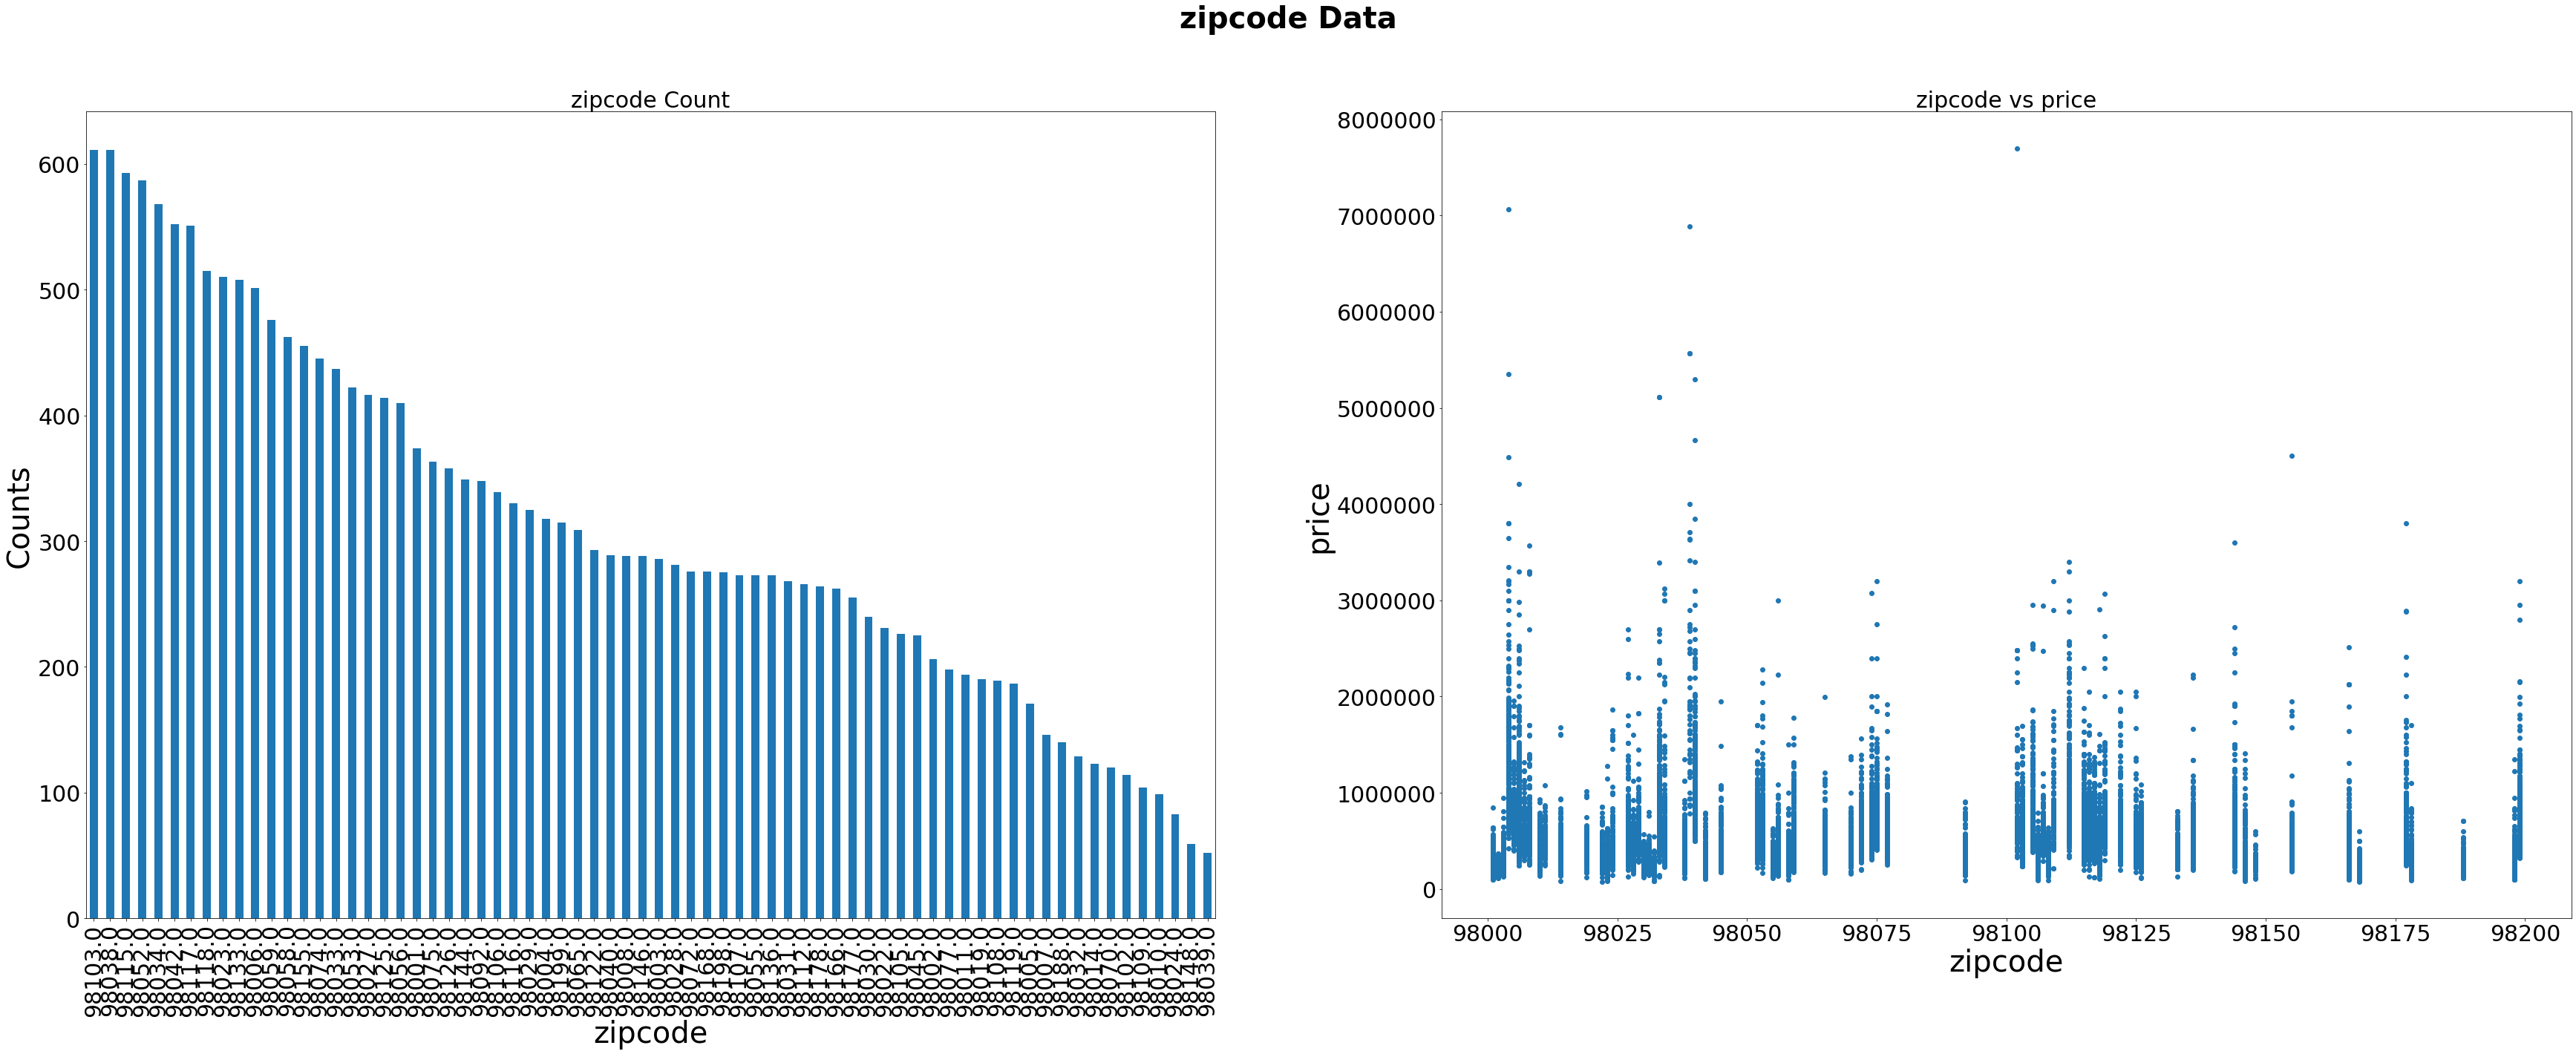

In [39]:
Feature_Plot_Check('zipcode', 'price')

#### 5.3.12 latitude
- As we can see latitude of 47.5322 has the highest transactions 
- Price demand in the range 45.5 to 45.7

In [40]:
df.latitude.value_counts()

47.5322    19
47.6886    18
47.6711    18
47.6624    18
47.6727    17
47.6955    17
47.5491    17
47.5305    16
47.6801    16
47.6846    16
47.6842    16
47.6904    16
47.6374    15
47.6647    15
47.5400    15
47.6853    15
47.5524    15
47.6968    15
47.6754    15
47.5396    15
47.5518    15
47.6729    15
47.6285    15
47.5533    15
47.6876    14
47.6844    14
47.5427    14
47.6860    14
47.5590    14
47.5445    14
           ..
47.5594     1
47.2689     1
47.4769     1
47.3010     1
47.2133     1
47.2151     1
47.4426     1
47.3861     1
47.5562     1
47.4098     1
47.2159     1
47.2712     1
47.3928     1
47.3885     1
47.2416     1
47.4884     1
47.4946     1
47.2810     1
47.5236     1
47.3309     1
47.2860     1
47.2060     1
47.4788     1
47.1647     1
47.6026     1
47.6002     1
47.3265     1
47.3656     1
47.2105     1
47.2715     1
Name: latitude, Length: 5002, dtype: int64

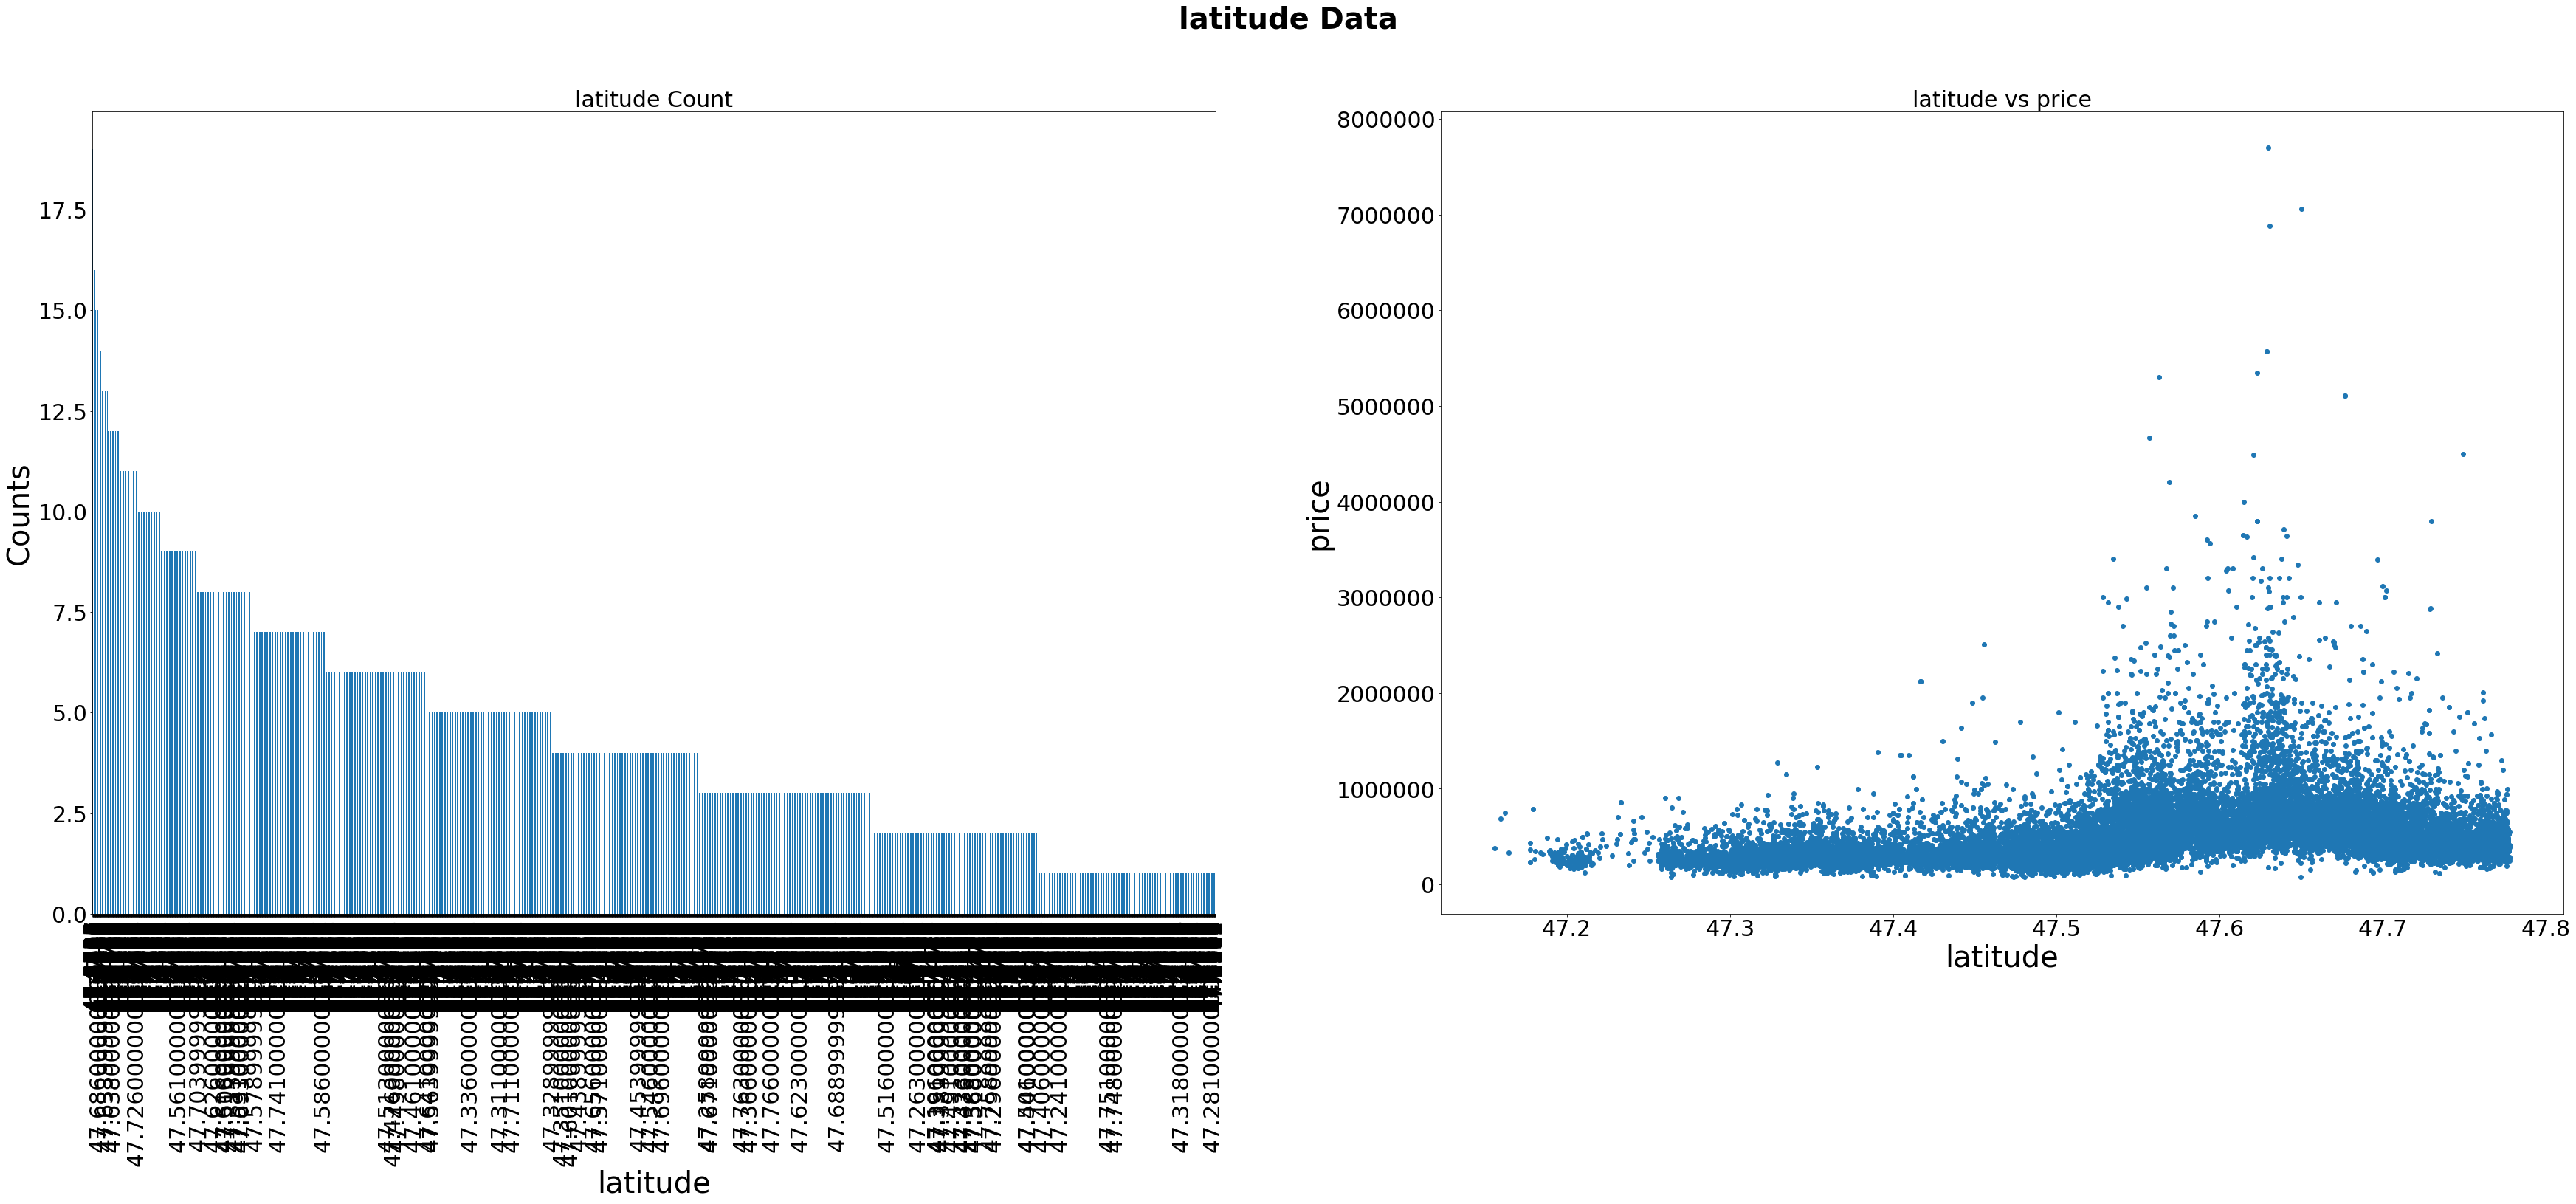

In [114]:
Feature_Plot_Check('latitude', 'price')

#### 5.3.13 longitude
- As we can see longitude of 122.29 has the highest transactions 
- Price demand in the range -122.3 to -122.1

In [115]:
df.longitude.value_counts()

-122.290    117
-122.300    116
-122.291    105
-122.362    103
-122.288    100
-122.172    100
-122.372     99
-122.365     98
-122.363     98
-122.284     98
-122.357     97
-122.299     97
-122.348     96
-122.346     95
-122.306     95
-122.352     95
-122.304     94
-122.391     92
-122.289     91
-122.285     90
-122.354     90
-122.351     90
-122.359     89
-122.375     89
-122.349     88
-122.292     88
-122.316     87
-122.295     87
-122.384     87
-122.317     87
           ... 
-121.701      1
-121.820      1
-122.433      1
-122.447      1
-121.847      1
-121.893      1
-121.788      1
-121.325      1
-122.514      1
-121.725      1
-121.646      1
-121.760      1
-122.499      1
-121.792      1
-122.512      1
-121.815      1
-121.823      1
-121.359      1
-121.822      1
-121.711      1
-121.480      1
-122.491      1
-122.479      1
-121.782      1
-121.804      1
-121.801      1
-121.726      1
-122.473      1
-121.895      1
-121.849      1
Name: longitude, Length:

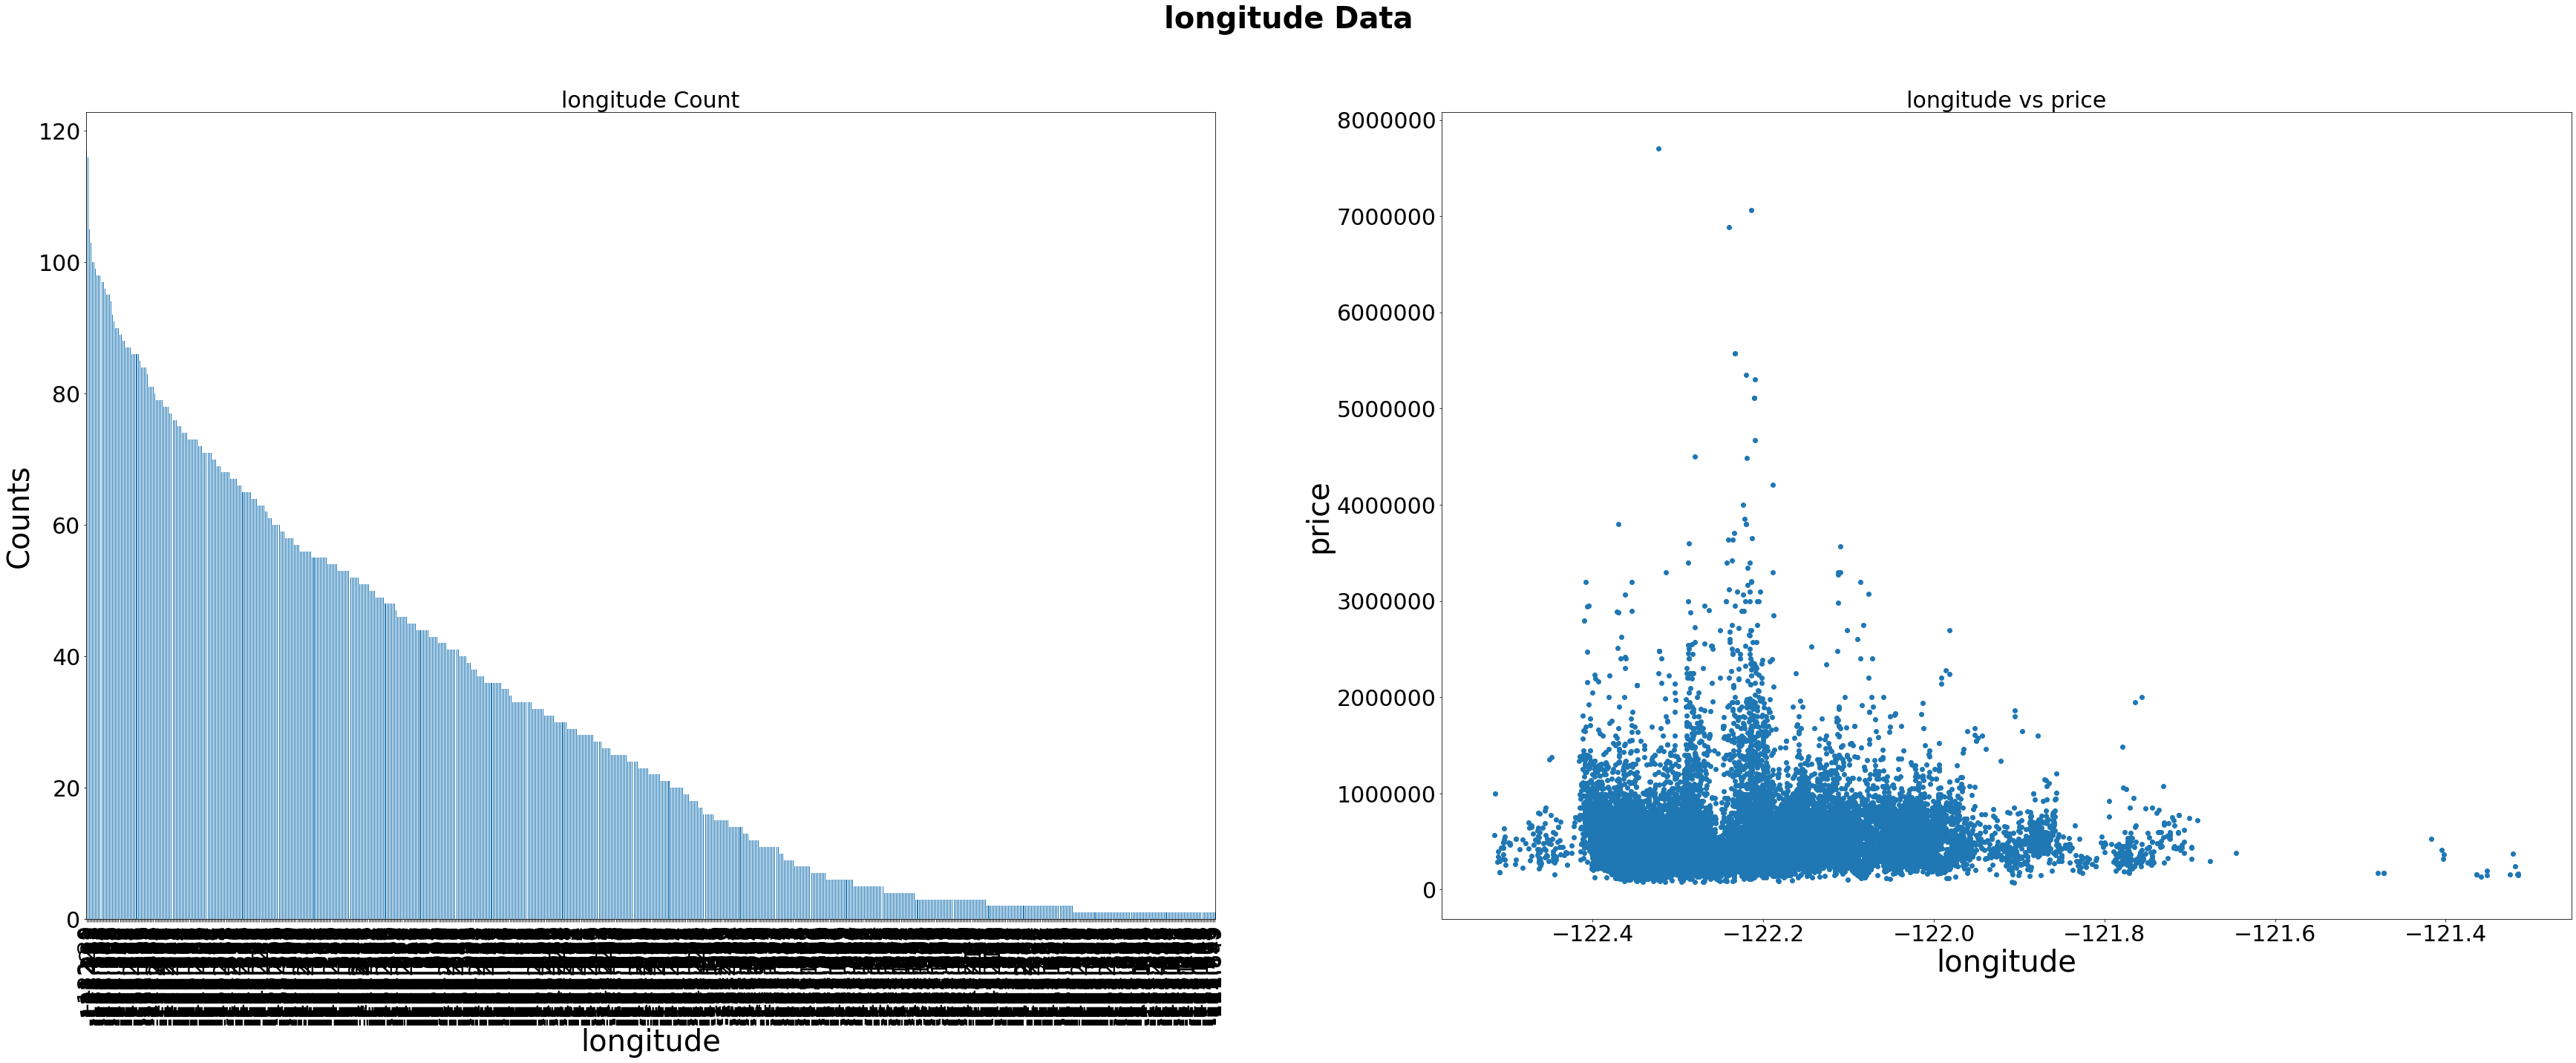

In [116]:
Feature_Plot_Check('longitude', 'price')

#### 5.3.14 living_room_size
- As we can see living_room_size of 1440 has the highest transactions 
- living_room_size and price has positive correlation 
- It has range between 399 to 6210 sqft and we can see many preferred around 1400 to 1600 in size. On average most are in the range between 1000 to 3000 sqft probably due to the price per sqft charge as there is positive correlation between living room size and the price 

In [42]:
df.living_room_size.value_counts()

1440.0    205
1540.0    203
1560.0    199
1500.0    181
1820.0    171
1720.0    171
1760.0    169
1620.0    169
1580.0    169
1610.0    168
1800.0    167
1470.0    166
1460.0    164
1600.0    162
1660.0    161
1510.0    160
1550.0    160
1530.0    160
1480.0    160
1670.0    160
1680.0    159
1520.0    158
1420.0    155
1650.0    155
1640.0    155
1410.0    154
1300.0    154
1780.0    153
1570.0    151
1690.0    150
         ... 
2425.0      1
2154.0      1
2002.0      1
2725.0      1
2076.0      1
3193.0      1
2697.0      1
1638.0      1
4490.0      1
1098.0      1
2844.0      1
1943.0      1
4495.0      1
1862.0      1
2112.0      1
1554.0      1
2496.0      1
4520.0      1
1399.0      1
2647.0      1
3335.0      1
2594.0      1
2214.0      1
2912.0      1
1961.0      1
1691.0      1
2458.0      1
2256.0      1
4250.0      1
4330.0      1
Name: living_room_size, Length: 764, dtype: int64

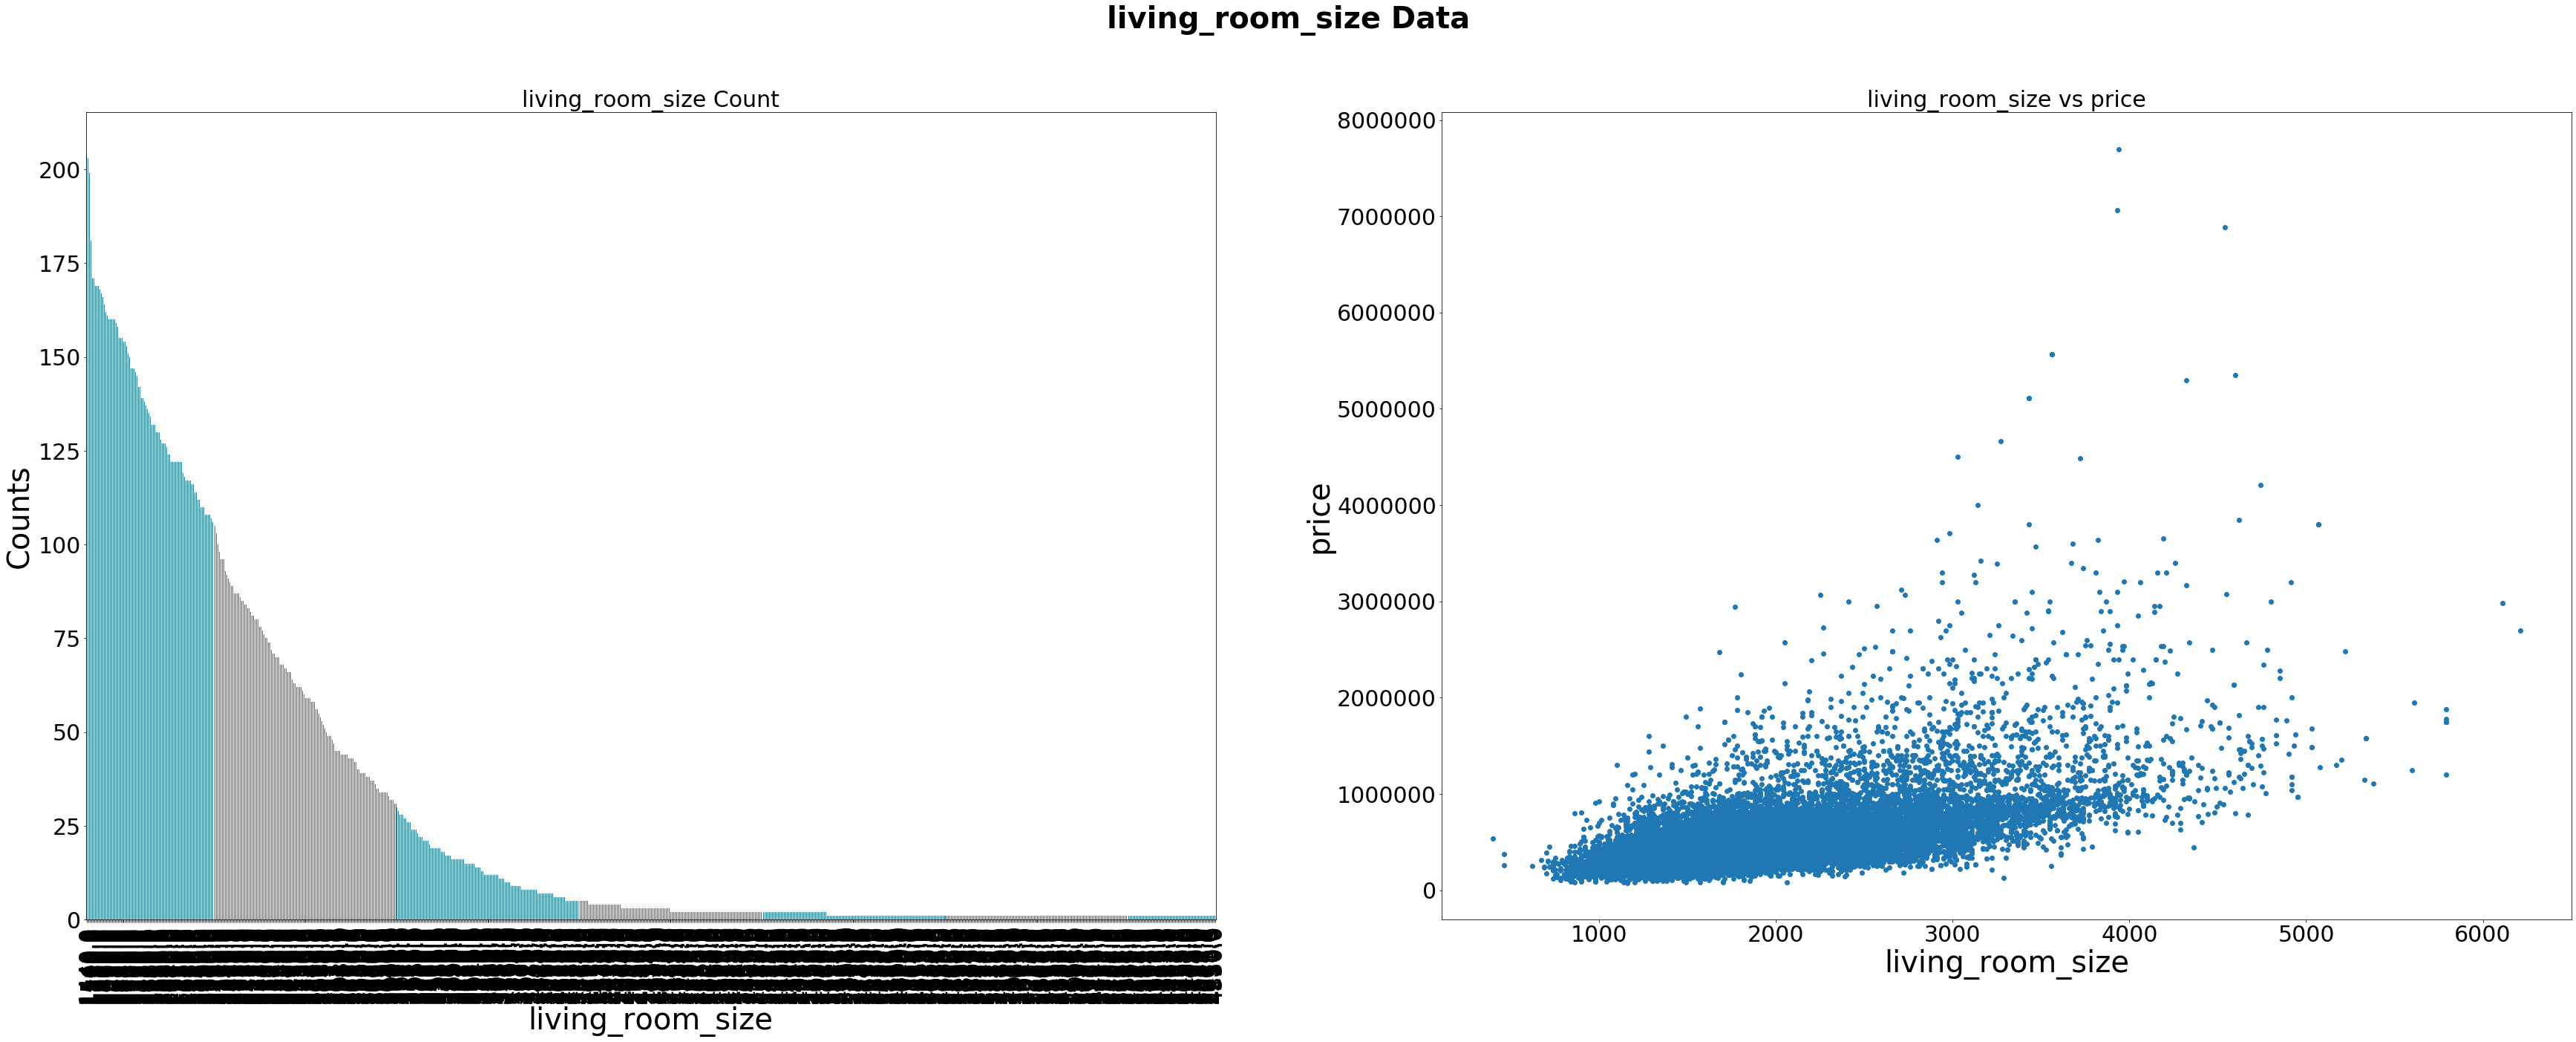

In [43]:
Feature_Plot_Check('living_room_size', 'price')

#### 5.3.15 lot_size 
- As we can see lot_size of 5000 has the highest transactions 
- Seems like most demand is in the smallest lot size 
- It has range between 651 to 871200 sqft and we can see many preferred around 5000 to 8000 sqft in size. This is probably due to maintainance effort for huge area consideration 

In [44]:
df.lot_size.value_counts()

5000.0      421
4000.0      367
6000.0      292
7200.0      207
4800.0      151
7500.0      142
8400.0      121
5100.0      113
4500.0      110
3600.0      108
4080.0      106
8000.0      105
9600.0       98
9000.0       93
5500.0       90
8100.0       90
7700.0       88
7800.0       88
5400.0       74
6600.0       70
7350.0       68
5200.0       67
4400.0       65
5750.0       64
4200.0       59
7560.0       57
10000.0      56
3000.0       53
5250.0       51
8800.0       51
           ... 
5006.0        1
38638.0       1
21070.0       1
13176.0       1
7764.0        1
5325.0        1
3698.0        1
14212.0       1
3322.0        1
11045.0       1
7054.0        1
4132.0        1
5537.0        1
14249.0       1
35982.0       1
19564.0       1
5655.0        1
11815.0       1
24640.0       1
3944.0        1
8998.0        1
10244.0       1
41384.0       1
14973.0       1
143947.0      1
15606.0       1
4825.0        1
36042.0       1
15983.0       1
4091.0        1
Name: lot_size, Length: 

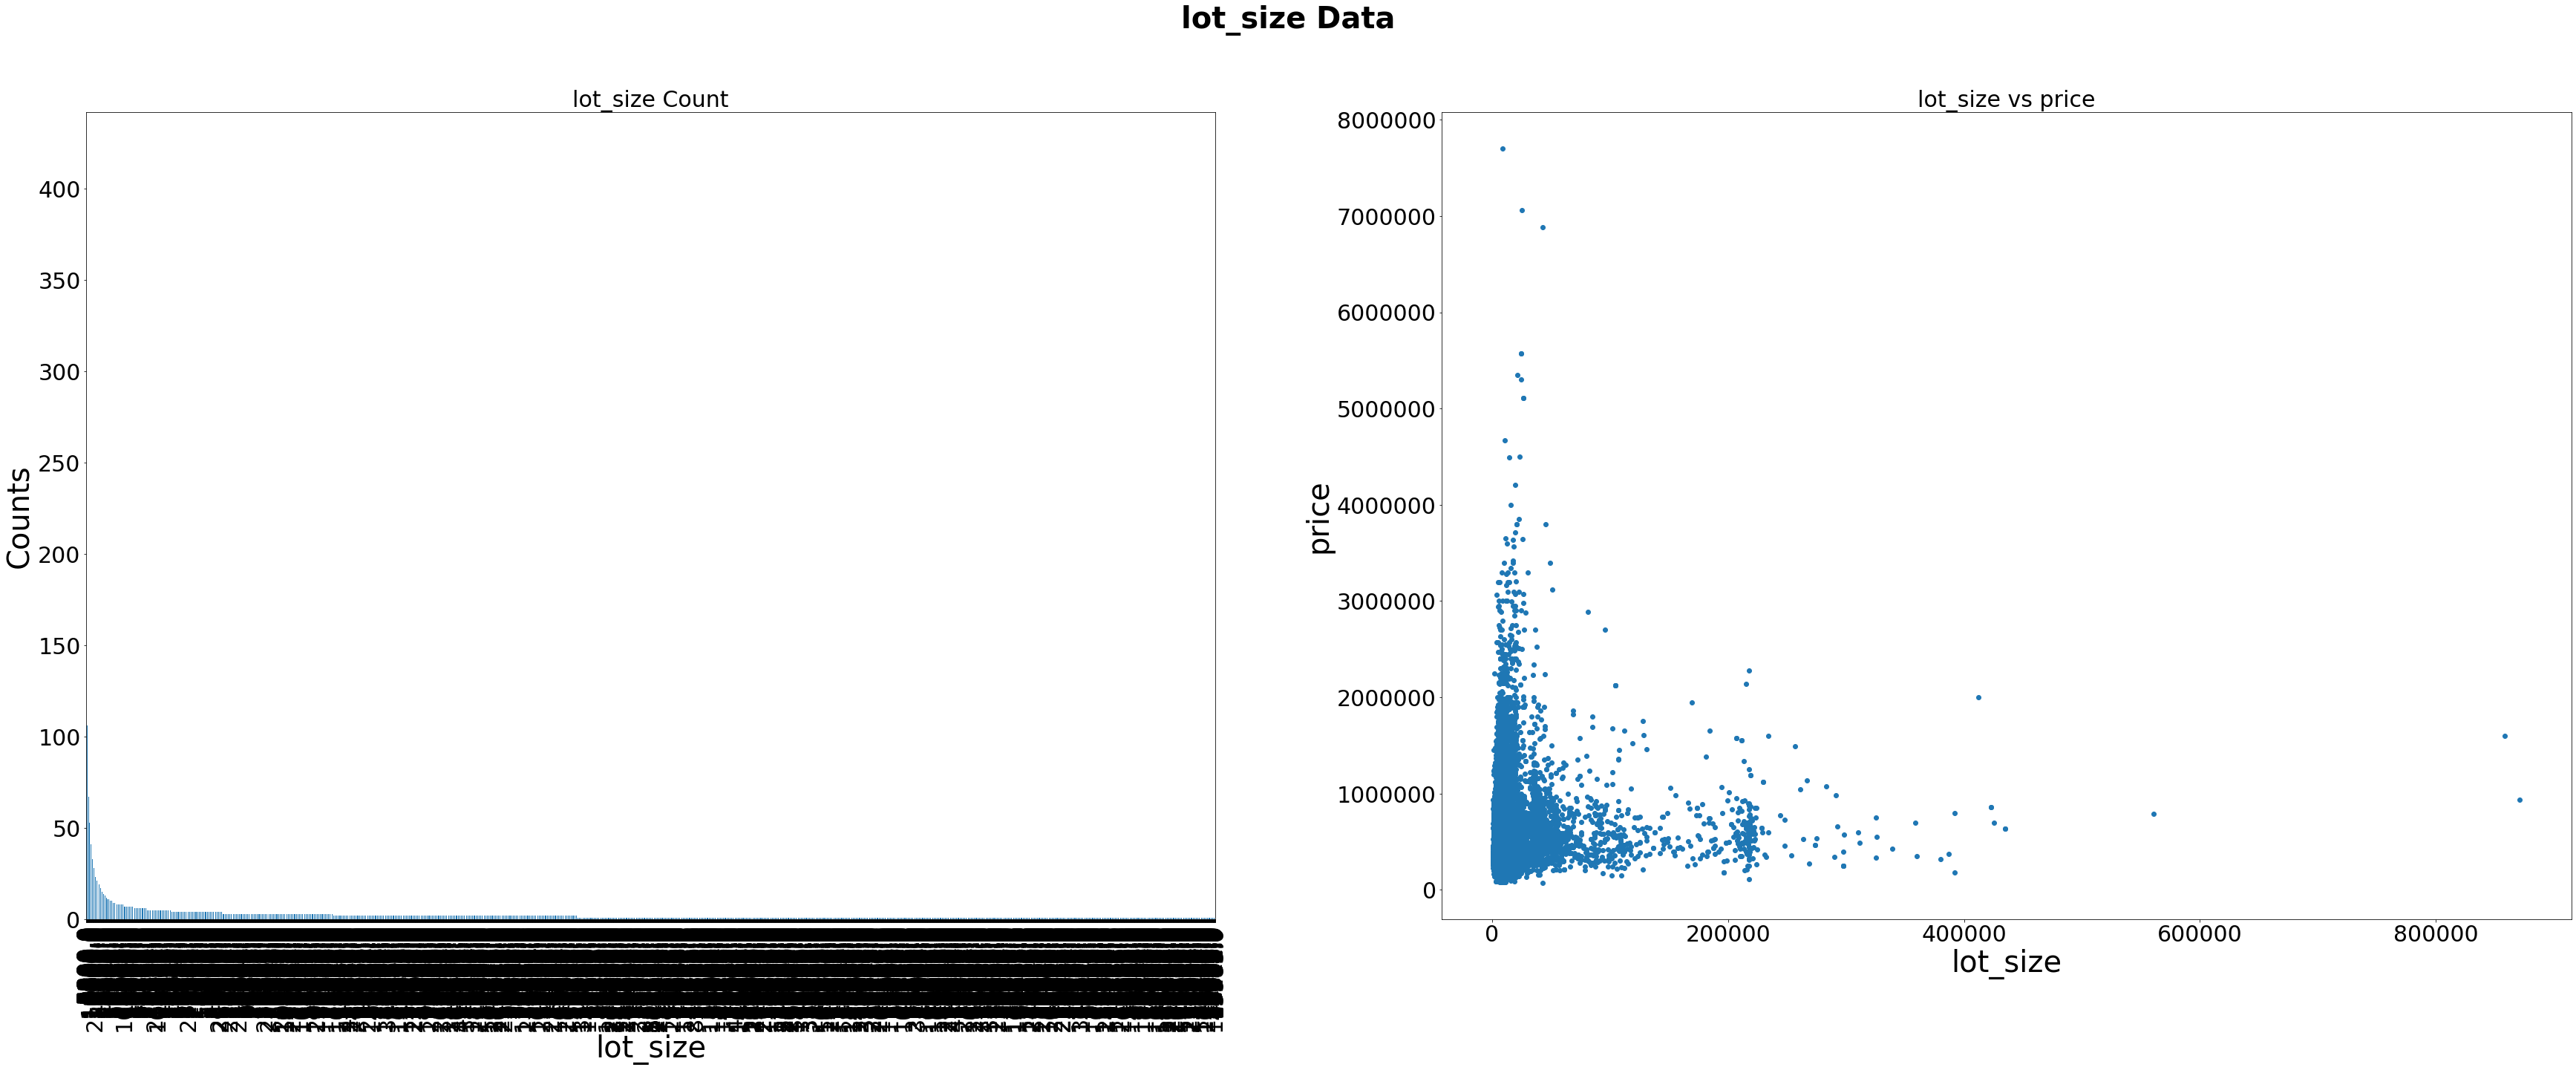

In [45]:
Feature_Plot_Check('lot_size', 'price')

### 5.4 Checking feature correlations

Shows that there is not high correlations between features

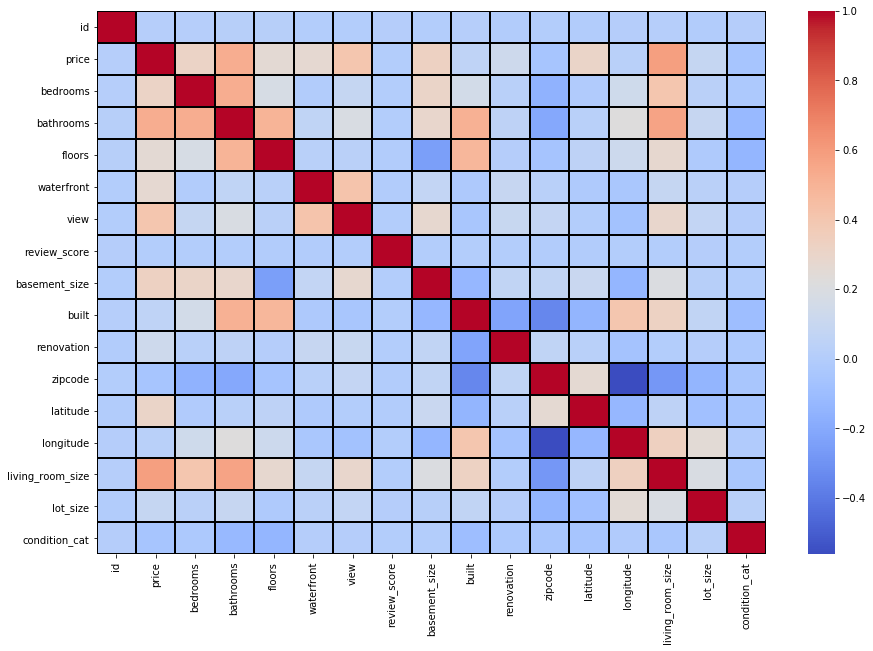

In [19]:
corr_co=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_co,cmap='coolwarm',linecolor='black',linewidths=1)

## 6.0 Feature Engineering

### 6.1 Category Data Encoding

In [46]:
cat_features = ['bedrooms','bathrooms','floors','view','review_score','condition']

In [93]:
drop_df = df.copy()

In [94]:
le = LabelEncoder()
for i in cat_features:
    drop_df[i] = le.fit_transform(drop_df[i].astype(str))
    print("\n" + i + " Label mapping:")
    for j, item in enumerate(le.classes_):
        print(item, '-->', j)


bedrooms Label mapping:
0.0 --> 0
1.0 --> 1
10.0 --> 2
11.0 --> 3
2.0 --> 4
3.0 --> 5
4.0 --> 6
5.0 --> 7
6.0 --> 8
7.0 --> 9
8.0 --> 10
9.0 --> 11
nan --> 12

bathrooms Label mapping:
0.0 --> 0
0.5 --> 1
0.75 --> 2
1.0 --> 3
1.25 --> 4
1.5 --> 5
1.75 --> 6
2.0 --> 7
2.25 --> 8
2.5 --> 9
2.75 --> 10
3.0 --> 11
3.25 --> 12
3.5 --> 13
3.75 --> 14
4.0 --> 15
4.25 --> 16
4.5 --> 17
4.75 --> 18
5.0 --> 19
5.25 --> 20
5.5 --> 21
5.75 --> 22
6.0 --> 23
6.25 --> 24
6.5 --> 25
6.75 --> 26
7.5 --> 27
7.75 --> 28
8.0 --> 29
nan --> 30

floors Label mapping:
1.0 --> 0
1.5 --> 1
2.0 --> 2
2.5 --> 3
3.0 --> 4
3.5 --> 5
nan --> 6

view Label mapping:
0.0 --> 0
1.0 --> 1
2.0 --> 2
3.0 --> 3
4.0 --> 4
nan --> 5

review_score Label mapping:
1.0 --> 0
10.0 --> 1
11.0 --> 2
12.0 --> 3
13.0 --> 4
3.0 --> 5
4.0 --> 6
5.0 --> 7
6.0 --> 8
7.0 --> 9
8.0 --> 10
9.0 --> 11
nan --> 12

condition Label mapping:
None --> 0
excellent --> 1
fair --> 2
good --> 3
poor --> 4
terrible --> 5


In [95]:
drop_df['year'] = drop_df['date'].str[-4:]

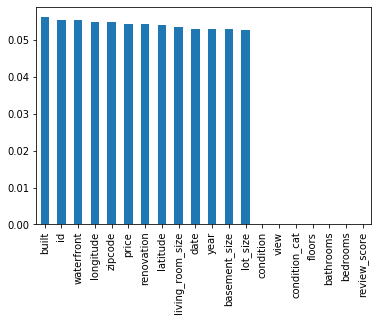

In [96]:
drop_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

### 6.2 Drop unuseful features and null rows

remove null and 0 data

In [97]:
columns = ['built', 'longitude','latitude','date','lot_size','price']
drop_df = drop_df.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0)

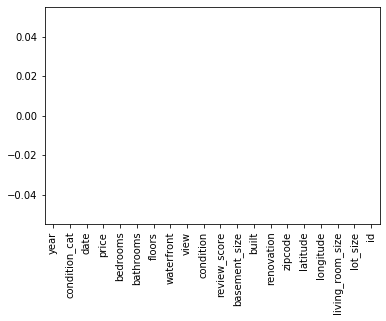

In [98]:
drop_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

drop non useful features

In [99]:
drop_df = df.drop(['id','basement_size','renovation','condition','condition_cat','date'],axis=1)

In [100]:
drop_df.shape

(23154, 13)

remove all nan data

In [101]:
drop_df = drop_df.dropna()

In [102]:
drop_df.shape

(19688, 13)

In [ ]:
corr_co=df_co_num.drop("snow_1h",axis=1).corr()
sns.heatmap(corr_co)

## 7.0 Save featured Engineered dataset for regression

In [57]:
drop_df.to_csv('data/regression_dataset.csv',index=False)

## 8.0 Create dataset target for classification

In [58]:
drop_df['price'].describe()

count    1.968800e+04
mean     5.434626e+05
std      3.733997e+05
min      7.500000e+04
25%      3.230000e+05
50%      4.520000e+05
75%      6.500000e+05
max      7.700000e+06
Name: price, dtype: float64

### 8.1 Create bin of price target using pandas cut
- The simplest use of cut is to define the number of category. Below, we tell pandas cut and qcut to create quadrants and 8 equal sized groupings of the data.
- I have tried divided into 8 equal size with freq=1000000 but end up the last class has only one instance and the last few class have only very samples. Hence not suitable
- with quadrant = 4 size we can have balance of price data

### 8.1.1 Create bin with qcut quadrant

In [103]:
drop_df['price_cat_1'], bin_edges = pd.qcut(drop_df['price'],
                            q=4,
                            labels=False,
                            precision=0,
                            retbins=True)

In [111]:
bin_edges = pd.DataFrame(bin_edges)

In [112]:
bin_edges.columns = ['price_cat_range']
bin_edges

,price_cat_range
0,75000.0
1,323000.0
2,452000.0
3,650000.0
4,7700000.0


In [68]:
drop_df['price_cat_1'].value_counts()

2    5014
1    4924
0    4923
3    4827
Name: price_cat_1, dtype: int64

In [69]:
drop_df['price_cat_1'] = drop_df['price_cat_1'].astype(int)

In [70]:
drop_df

,price,bedrooms,bathrooms,floors,waterfront,view,review_score,built,zipcode,latitude,longitude,living_room_size,lot_size,price_cat_1
0,221900.0,3.0,1.00,1.0,0.0,0.0,10.0,1955.0,98178.0,47.5112,-122.257,1340.0,5650.0,0
1,538000.0,3.0,2.25,2.0,0.0,0.0,7.0,1951.0,98125.0,47.7210,-122.319,1690.0,7639.0,2
2,180000.0,2.0,1.00,1.0,0.0,0.0,8.0,1933.0,98028.0,47.7379,-122.233,2720.0,8062.0,0
3,604000.0,4.0,3.00,1.0,0.0,0.0,6.0,1965.0,98136.0,47.5208,-122.393,1360.0,5000.0,2
4,510000.0,3.0,2.00,1.0,0.0,0.0,6.0,1987.0,98074.0,47.6168,-122.045,1800.0,7503.0,2
5,1225000.0,4.0,4.50,1.0,0.0,0.0,8.0,2001.0,98053.0,47.6561,-122.005,4760.0,101930.0,3
6,257500.0,3.0,2.25,2.0,0.0,0.0,7.0,1995.0,98003.0,47.3097,-122.327,2238.0,6819.0,0
7,291850.0,3.0,1.50,1.0,0.0,0.0,7.0,1963.0,98198.0,47.4095,-122.315,1650.0,9711.0,0
8,229500.0,3.0,1.00,1.0,0.0,0.0,7.0,1960.0,98146.0,47.5123,-122.337,1780.0,8113.0,0
9,323000.0,3.0,2.50,2.0,0.0,0.0,7.0,2003.0,98038.0,47.3684,-122.031,2390.0,7570.0,0


### 8.1.2 Create bin with cut using custom define range

In [74]:
interval_range = pd.interval_range(start=0, freq=1000000, end=8000000, closed='left')

In [75]:
len(interval_range)

8

In [76]:
interval_range

IntervalIndex([[0, 1000000), [1000000, 2000000), [2000000, 3000000), [3000000, 4000000), [4000000, 5000000), [5000000, 6000000), [6000000, 7000000), [7000000, 8000000)],
              closed='left',
              dtype='interval[int64]')

Get the range mapping for the price category

In [77]:
price_cat_range = pd.DataFrame(interval_range.to_tuples())

In [78]:
price_cat_range.columns = ['price_cat_range']
price_cat_range

,price_cat_range
0,"(0, 1000000)"
1,"(1000000, 2000000)"
2,"(2000000, 3000000)"
3,"(3000000, 4000000)"
4,"(4000000, 5000000)"
5,"(5000000, 6000000)"
6,"(6000000, 7000000)"
7,"(7000000, 8000000)"


In [79]:
price_cat_range['price_cat_range'][3]

(3000000, 4000000)

In [81]:
x, bin_results = pd.cut(drop_df['price'].to_list(), bins=interval_range,retbins=True)
x.categories = [1,2,3,4,5,6,7,8]

In [82]:
drop_df['price_cat_2'] = x
drop_df

,price,bedrooms,bathrooms,floors,waterfront,view,review_score,built,zipcode,latitude,longitude,living_room_size,lot_size,price_cat_1,price_cat_2
0,221900.0,3.0,1.00,1.0,0.0,0.0,10.0,1955.0,98178.0,47.5112,-122.257,1340.0,5650.0,0,1
1,538000.0,3.0,2.25,2.0,0.0,0.0,7.0,1951.0,98125.0,47.7210,-122.319,1690.0,7639.0,2,1
2,180000.0,2.0,1.00,1.0,0.0,0.0,8.0,1933.0,98028.0,47.7379,-122.233,2720.0,8062.0,0,1
3,604000.0,4.0,3.00,1.0,0.0,0.0,6.0,1965.0,98136.0,47.5208,-122.393,1360.0,5000.0,2,1
4,510000.0,3.0,2.00,1.0,0.0,0.0,6.0,1987.0,98074.0,47.6168,-122.045,1800.0,7503.0,2,1
5,1225000.0,4.0,4.50,1.0,0.0,0.0,8.0,2001.0,98053.0,47.6561,-122.005,4760.0,101930.0,3,2
6,257500.0,3.0,2.25,2.0,0.0,0.0,7.0,1995.0,98003.0,47.3097,-122.327,2238.0,6819.0,0,1
7,291850.0,3.0,1.50,1.0,0.0,0.0,7.0,1963.0,98198.0,47.4095,-122.315,1650.0,9711.0,0,1
8,229500.0,3.0,1.00,1.0,0.0,0.0,7.0,1960.0,98146.0,47.5123,-122.337,1780.0,8113.0,0,1
9,323000.0,3.0,2.50,2.0,0.0,0.0,7.0,2003.0,98038.0,47.3684,-122.031,2390.0,7570.0,0,1


In [83]:
drop_df['price_cat_2'].value_counts()

1    18311
2     1188
3      137
4       38
6        6
5        5
8        2
7        1
Name: price_cat_2, dtype: int64

### 8.1.3 Final bin cut

Since the qcut with quadrant has better balance data, we will use it 

In [84]:
drop_df = drop_df.drop(['price','price_cat_2'],axis=1)
drop_df

,bedrooms,bathrooms,floors,waterfront,view,review_score,built,zipcode,latitude,longitude,living_room_size,lot_size,price_cat_1
0,3.0,1.00,1.0,0.0,0.0,10.0,1955.0,98178.0,47.5112,-122.257,1340.0,5650.0,0
1,3.0,2.25,2.0,0.0,0.0,7.0,1951.0,98125.0,47.7210,-122.319,1690.0,7639.0,2
2,2.0,1.00,1.0,0.0,0.0,8.0,1933.0,98028.0,47.7379,-122.233,2720.0,8062.0,0
3,4.0,3.00,1.0,0.0,0.0,6.0,1965.0,98136.0,47.5208,-122.393,1360.0,5000.0,2
4,3.0,2.00,1.0,0.0,0.0,6.0,1987.0,98074.0,47.6168,-122.045,1800.0,7503.0,2
5,4.0,4.50,1.0,0.0,0.0,8.0,2001.0,98053.0,47.6561,-122.005,4760.0,101930.0,3
6,3.0,2.25,2.0,0.0,0.0,7.0,1995.0,98003.0,47.3097,-122.327,2238.0,6819.0,0
7,3.0,1.50,1.0,0.0,0.0,7.0,1963.0,98198.0,47.4095,-122.315,1650.0,9711.0,0
8,3.0,1.00,1.0,0.0,0.0,7.0,1960.0,98146.0,47.5123,-122.337,1780.0,8113.0,0
9,3.0,2.50,2.0,0.0,0.0,7.0,2003.0,98038.0,47.3684,-122.031,2390.0,7570.0,0


## 9.0 Save featured Engineered dataset for classification

In [85]:
drop_df.to_csv('data/classification_dataset.csv',index=False)

In [113]:
bin_edges.to_csv('data/classification_price_cat.csv',index=False)